In [1]:
# 查看westat版本号和安装路径
import westat
print('version:',westat.version)
print('path:',westat.__path__)

version: 0.2.2
path: ['C:\\Users\\Administrator\\Documents\\westat\\westat']


## 一、数据准备

In [2]:
from westat import *

# westat 自带了 GiveMeSomeCredit 和 UCI_Credit_Card 两个数据集，可使用 GiveMeSomeCredit() 或 credit_card() 导入相关数据
# data=GiveMeSomeCredit()
# data_train = data.train
# data_test = data.test

# data=credit_card()


data=credit_card()
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.00,2,2,1,24,2,2,-1,-1,-2,-2,3913.00,3102.00,689.00,0.00,0.00,0.00,0.00,689.00,0.00,0.00,0.00,0.00,1
1,2,120000.00,2,2,2,26,-1,2,0,0,0,2,2682.00,1725.00,2682.00,3272.00,3455.00,3261.00,0.00,1000.00,1000.00,1000.00,0.00,2000.00,1
2,3,90000.00,2,2,2,34,0,0,0,0,0,0,29239.00,14027.00,13559.00,14331.00,14948.00,15549.00,1518.00,1500.00,1000.00,1000.00,1000.00,5000.00,0
3,4,50000.00,2,2,1,37,0,0,0,0,0,0,46990.00,48233.00,49291.00,28314.00,28959.00,29547.00,2000.00,2019.00,1200.00,1100.00,1069.00,1000.00,0
4,5,50000.00,1,2,1,57,-1,0,-1,0,0,0,8617.00,5670.00,35835.00,20940.00,19146.00,19131.00,2000.00,36681.00,10000.00,9000.00,689.00,679.00,0


In [3]:
# 将目标变量重命名为“y”
data.rename(columns={'target':'y'},inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000.00,2,2,1,24,2,2,-1,-1,-2,-2,3913.00,3102.00,689.00,0.00,0.00,0.00,0.00,689.00,0.00,0.00,0.00,0.00,1
1,2,120000.00,2,2,2,26,-1,2,0,0,0,2,2682.00,1725.00,2682.00,3272.00,3455.00,3261.00,0.00,1000.00,1000.00,1000.00,0.00,2000.00,1
2,3,90000.00,2,2,2,34,0,0,0,0,0,0,29239.00,14027.00,13559.00,14331.00,14948.00,15549.00,1518.00,1500.00,1000.00,1000.00,1000.00,5000.00,0
3,4,50000.00,2,2,1,37,0,0,0,0,0,0,46990.00,48233.00,49291.00,28314.00,28959.00,29547.00,2000.00,2019.00,1200.00,1100.00,1069.00,1000.00,0
4,5,50000.00,1,2,1,57,-1,0,-1,0,0,0,8617.00,5670.00,35835.00,20940.00,19146.00,19131.00,2000.00,36681.00,10000.00,9000.00,689.00,679.00,0


## 二、数据探索

In [4]:
# 查看数据
proc_means(data,['LIMIT_BAL','AGE'])

,Variable,N,Mean,Std Dev,Minimum,Maximum
0,LIMIT_BAL,30000,167484.32,129747.66,10000.00,1000000.00
1,AGE,30000,35.49,9.22,21.00,79.00


In [5]:
# 查看全部数据详情
data_desc(data)

,Name,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,int64,feature,30000,30000,100.00%,0,0.00%,30000,100.00%,450015000.00,1.00,15000.50,7500.75,15000.50,22500.25,30000.00,1.00,19997.00,20009.00
1,LIMIT_BAL,float64,feature,30000,30000,100.00%,0,0.00%,81,0.27%,5024529680.00,10000.00,167484.32,50000.00,140000.00,240000.00,1000000.00,50000.00,20000.00,30000.00
2,SEX,int64,feature,30000,30000,100.00%,0,0.00%,2,0.01%,48112.00,1.00,1.60,1.00,2.00,2.00,2.00,2.00,1.00,NaN
3,EDUCATION,int64,feature,30000,30000,100.00%,0,0.00%,7,0.02%,55594.00,0.00,1.85,1.00,2.00,2.00,6.00,2.00,1.00,3.00
4,MARRIAGE,int64,feature,30000,30000,100.00%,0,0.00%,4,0.01%,46556.00,0.00,1.55,1.00,2.00,2.00,3.00,2.00,1.00,3.00
5,AGE,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%,1064565.00,21.00,35.49,28.00,34.00,41.00,79.00,29.00,27.00,28.00
6,PAY_0,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-501.00,-2.00,-0.02,-1.00,0.00,0.00,8.00,0.00,-1.00,1.00
7,PAY_2,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-4013.00,-2.00,-0.13,-1.00,0.00,0.00,8.00,0.00,-1.00,2.00
8,PAY_3,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-4986.00,-2.00,-0.17,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00
9,PAY_4,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-6620.00,-2.00,-0.22,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00


In [6]:
# 查看指定列的数据详情
data_desc(data[['AGE','PAY_0']])

,Name,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,AGE,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%,1064565,21,35.49,28.00,34.00,41.00,79,29,27,28
1,PAY_0,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-501,-2,-0.02,-1.00,0.00,0.00,8,0,-1,1


In [7]:
# 查看指定的统计结果
data_desc(data,key=['#Mean'])

,Name,#Mean
0,ID,15000.50
1,LIMIT_BAL,167484.32
2,SEX,1.60
3,EDUCATION,1.85
4,MARRIAGE,1.55
5,AGE,35.49
6,PAY_0,-0.02
7,PAY_2,-0.13
8,PAY_3,-0.17
9,PAY_4,-0.22


In [8]:
# 查看数据详细信息，指定缺失值和数据精度
data_desc(data,missing=[],precision=0)

,Name,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,int64,feature,30000,30000,100%,0,0%,30000,100%,450015000.00,1.00,15000.00,7501.00,15000.00,22500.00,30000.00,1.00,19997.00,20009.00
1,LIMIT_BAL,float64,feature,30000,30000,100%,0,0%,81,0%,5024529680.00,10000.00,167484.00,50000.00,140000.00,240000.00,1000000.00,50000.00,20000.00,30000.00
2,SEX,int64,feature,30000,30000,100%,0,0%,2,0%,48112.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,NaN
3,EDUCATION,int64,feature,30000,30000,100%,0,0%,7,0%,55594.00,0.00,2.00,1.00,2.00,2.00,6.00,2.00,1.00,3.00
4,MARRIAGE,int64,feature,30000,30000,100%,0,0%,4,0%,46556.00,0.00,2.00,1.00,2.00,2.00,3.00,2.00,1.00,3.00
5,AGE,int64,feature,30000,30000,100%,0,0%,56,0%,1064565.00,21.00,35.00,28.00,34.00,41.00,79.00,29.00,27.00,28.00
6,PAY_0,int64,feature,30000,30000,100%,0,0%,11,0%,-501.00,-2.00,-0.00,-1.00,0.00,0.00,8.00,0.00,-1.00,1.00
7,PAY_2,int64,feature,30000,30000,100%,0,0%,11,0%,-4013.00,-2.00,-0.00,-1.00,0.00,0.00,8.00,0.00,-1.00,2.00
8,PAY_3,int64,feature,30000,30000,100%,0,0%,11,0%,-4986.00,-2.00,-0.00,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00
9,PAY_4,int64,feature,30000,30000,100%,0,0%,11,0%,-6620.00,-2.00,-0.00,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00


In [9]:
# 查看数据详细信息，显示更多描述性统计信息，并以中文显示标题
data_desc(data,key=['Type','#Sum','#Min','#Q1','#Median','#Q3','#Max','#Mode','#Var','#Std','#Mean','#Kurt','#Skew','#StdMean','#Range','#Cv','#Sum_of_squares','Top1','Top2','Top3'],language='cn')

,名称,类型,#合计,#最小值,下四分位数,#中位数,上四分位数,#最大值,#众数,#方差,#标准差,#均值,#峰度,#偏度,#标准误差,#极差,#变异系数,#平方和,Top1,Top2,Top3
0,ID,int64,450015000.00,1.00,7500.75,15000.50,22500.25,30000.00,1.00,75002500.00,8660.40,15000.50,-1.20,0.00,50.00,29999.00,57.73%,9000450005000.00,1.00,19997.00,20009.00
1,LIMIT_BAL,float64,5024529680.00,10000.00,50000.00,140000.00,240000.00,1000000.00,50000.00,16834455682.16,129747.66,167484.32,0.54,0.99,749.10,990000.00,77.47%,1346546786182400.00,50000.00,20000.00,30000.00
2,SEX,int64,48112.00,1.00,1.00,2.00,2.00,2.00,2.00,0.24,0.49,1.60,-1.82,-0.42,0.00,1.00,30.50%,84336.00,2.00,1.00,NaN
3,EDUCATION,int64,55594.00,0.00,1.00,2.00,2.00,6.00,2.00,0.62,0.79,1.85,2.08,0.97,0.00,6.00,42.65%,121762.00,2.00,1.00,3.00
4,MARRIAGE,int64,46556.00,0.00,1.00,2.00,2.00,3.00,2.00,0.27,0.52,1.55,-1.36,-0.02,0.00,3.00,33.63%,80422.00,2.00,1.00,3.00
5,AGE,int64,1064565.00,21.00,28.00,34.00,41.00,79.00,29.00,84.97,9.22,35.49,0.04,0.73,0.05,58.00,25.98%,40325629.00,29.00,27.00,28.00
6,PAY_0,int64,-501.00,-2.00,-1.00,0.00,0.00,8.00,0.00,1.26,1.12,-0.02,2.72,0.73,0.01,10.00,-6729.35%,37895.00,0.00,-1.00,1.00
7,PAY_2,int64,-4013.00,-2.00,-1.00,0.00,0.00,8.00,0.00,1.43,1.20,-0.13,1.57,0.79,0.01,10.00,-894.98%,43533.00,0.00,-1.00,2.00
8,PAY_3,int64,-4986.00,-2.00,-1.00,0.00,0.00,8.00,0.00,1.43,1.20,-0.17,2.08,0.84,0.01,10.00,-720.14%,43802.00,0.00,-1.00,-2.00
9,PAY_4,int64,-6620.00,-2.00,-1.00,0.00,0.00,8.00,0.00,1.37,1.17,-0.22,3.50,1.00,0.01,10.00,-529.82%,42466.00,0.00,-1.00,-2.00


In [10]:
data_desc(data)

,Name,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,int64,feature,30000,30000,100.00%,0,0.00%,30000,100.00%,450015000.00,1.00,15000.50,7500.75,15000.50,22500.25,30000.00,1.00,19997.00,20009.00
1,LIMIT_BAL,float64,feature,30000,30000,100.00%,0,0.00%,81,0.27%,5024529680.00,10000.00,167484.32,50000.00,140000.00,240000.00,1000000.00,50000.00,20000.00,30000.00
2,SEX,int64,feature,30000,30000,100.00%,0,0.00%,2,0.01%,48112.00,1.00,1.60,1.00,2.00,2.00,2.00,2.00,1.00,NaN
3,EDUCATION,int64,feature,30000,30000,100.00%,0,0.00%,7,0.02%,55594.00,0.00,1.85,1.00,2.00,2.00,6.00,2.00,1.00,3.00
4,MARRIAGE,int64,feature,30000,30000,100.00%,0,0.00%,4,0.01%,46556.00,0.00,1.55,1.00,2.00,2.00,3.00,2.00,1.00,3.00
5,AGE,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%,1064565.00,21.00,35.49,28.00,34.00,41.00,79.00,29.00,27.00,28.00
6,PAY_0,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-501.00,-2.00,-0.02,-1.00,0.00,0.00,8.00,0.00,-1.00,1.00
7,PAY_2,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-4013.00,-2.00,-0.13,-1.00,0.00,0.00,8.00,0.00,-1.00,2.00
8,PAY_3,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-4986.00,-2.00,-0.17,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00
9,PAY_4,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-6620.00,-2.00,-0.22,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00


In [11]:
# 创建一个包含特征英文名 Name ，特征中文名 Label的 DataFrame
## 设置列的数据字典，包含Name 和Label 两列，用于保存特征英文名称，特征中文名称
col_dict = pd.DataFrame(data={'Name':['LIMIT_BAL','AGE','PAY_0'],'Label':['授信余额','年龄','支付金额']})

#在数据描述中展示特征中文名
data_desc(data,col_dict)

C:\Users\Administrator\Documents\westat\westat\explore\get_data_describe.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Describe'][result.iloc[:, -1].notnull()] = result.iloc[:, -1]


,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,100.00%,450015000.00,1.00,15000.50,7500.75,15000.50,22500.25,30000.00,1.00,19997.00,20009.00
1,LIMIT_BAL,授信余额,float64,feature,30000,30000,100.00%,0,0.00%,81,0.27%,5024529680.00,10000.00,167484.32,50000.00,140000.00,240000.00,1000000.00,50000.00,20000.00,30000.00
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,0.01%,48112.00,1.00,1.60,1.00,2.00,2.00,2.00,2.00,1.00,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,0.02%,55594.00,0.00,1.85,1.00,2.00,2.00,6.00,2.00,1.00,3.00
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,0.01%,46556.00,0.00,1.55,1.00,2.00,2.00,3.00,2.00,1.00,3.00
5,AGE,年龄,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%,1064565.00,21.00,35.49,28.00,34.00,41.00,79.00,29.00,27.00,28.00
6,PAY_0,支付金额,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-501.00,-2.00,-0.02,-1.00,0.00,0.00,8.00,0.00,-1.00,1.00
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-4013.00,-2.00,-0.13,-1.00,0.00,0.00,8.00,0.00,-1.00,2.00
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-4986.00,-2.00,-0.17,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-6620.00,-2.00,-0.22,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00


## 查看数据分布

In [12]:
# 查看目标变量的数据分布
value_counts(data)

,No.,Name,Value,#Count,%Ratio
0,1,y,0,23364,77.88%
1,2,y,1,6636,22.12%
2,3,Total,,30000,100.00%


In [13]:
data['y'].value_counts()

y
0    23364
1     6636
Name: count, dtype: int64

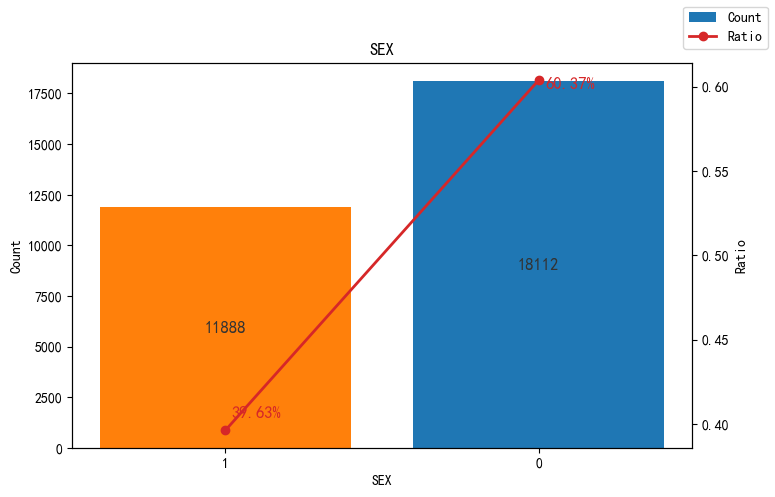

In [14]:
# 通过绘图查看指定变量的取值分布
plot_counts(data,'SEX')

In [15]:
# 也可通过 value_counts 的别名函数 data_dist 或 get_data_distribution 查看数据分布
data_dist(data,col='MARRIAGE')

,No.,Name,Value,#Count,%Ratio
0,1,MARRIAGE,2,15964,53.21%
1,2,MARRIAGE,1,13659,45.53%
2,3,MARRIAGE,3,323,1.08%
3,4,MARRIAGE,0,54,0.18%
4,5,Total,,30000,100.00%


In [16]:
# 也可通过value_counts 的别名函数 data_dist 或 get_data_distribution 查看数据分布
data_dist(data,col='MARRIAGE',language='en',precision=4,by=['#Count'],ascending =[True])

,No.,Name,Value,#Count,%Ratio
0,1,MARRIAGE,0,54,0.1800%
1,2,MARRIAGE,3,323,1.0767%
2,3,MARRIAGE,1,13659,45.5300%
3,4,MARRIAGE,2,15964,53.2133%
4,5,Total,,30000,100.0000%


## 数据分区

In [17]:
# 使用 data_split 函数进行数据分区，或者使用别名函数 get_data_partition，按随机测试集25%进行数据分区
data_train,data_test = data_split(data,0.25)

In [18]:
# 查看数据分区后的训练集数据分布
value_counts(data_train)

,No.,Name,Value,#Count,%Ratio
0,1,y,0,17564,78.06%
1,2,y,1,4936,21.94%
2,3,Total,,22500,100.00%


In [19]:
# 查看数据分区后的测试集数据分布
value_counts(data_test)

,No.,Name,Value,#Count,%Ratio
0,1,y,0,5800,77.33%
1,2,y,1,1700,22.67%
2,3,Total,,7500,100.00%


In [20]:
#删除重复值
data_train.drop_duplicates(inplace=True)
value_counts(data_train)

,No.,Name,Value,#Count,%Ratio
0,1,y,0,17564,78.06%
1,2,y,1,4936,21.94%
2,3,Total,,22500,100.00%


## 特征分箱

### 先大致分箱并检查变量的badRate趋势

In [21]:
# 等频分箱，计算WoE和IV，默认结果精度保留4位小数，通过 precision = 2 指定结果保留2位小数
woe_iv(data,col='AGE',qcut=5,precision=2)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.01%,24.08%,21.43%,24.20%,0.12,0.00,0.01
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.75%,16.61%,19.36%,19.59%,-0.15,0.00,0.01
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.43%,20.80%,22.89%,20.51%,-0.10,0.00,0.01
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.85%,16.58%,16.93%,21.76%,-0.02,0.00,0.01
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.95%,21.94%,19.39%,24.32%,0.12,0.00,0.01


In [22]:
#使用默认的决策树方法进行分箱
woe_iv(data,col='AGE')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.0213
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.1267%,38.6528%,44.3974%,19.8253%,-0.1386,0.0080,0.0213
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.0213
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.0213


In [23]:
#使用默认的决策树方法进行分箱，显示缺失值分组
woe_iv(data,col='AGE',show_missing =True)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,missing,0,0,0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000,0.0000,0.0213
1,AGE,2,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.0213
2,AGE,3,"(25.0, 35.0]",12938,2565,10373,43.1267%,38.6528%,44.3974%,19.8253%,-0.1386,0.0080,0.0213
3,AGE,4,"(35.0, 45.0]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.0213
4,AGE,5,"(45.0, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.0213


In [24]:
# 设置输出的分箱小数点位数
woe_iv(data,'AGE',precision=4)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.0213
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.1267%,38.6528%,44.3974%,19.8253%,-0.1386,0.0080,0.0213
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.0213
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.0213


In [25]:
# 按照指定的切分点 分箱，并计算 WoE 和 IV
woe_iv(data,'AGE',bins=[-inf,20,30,40,50,inf])

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 20.0]",0,0,0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000,0.0000,0.0072
1,AGE,2,"(20.0, 30.0]",11013,2471,8542,36.7100%,37.2363%,36.5605%,22.4371%,0.0183,0.0001,0.0072
2,AGE,3,"(30.0, 40.0]",10713,2189,8524,35.7100%,32.9867%,36.4835%,20.4331%,-0.1008,0.0035,0.0072
3,AGE,4,"(40.0, 50.0]",6005,1399,4606,20.0167%,21.0820%,19.7141%,23.2973%,0.0671,0.0009,0.0072
4,AGE,5,"(50.0, inf]",2269,577,1692,7.5633%,8.6950%,7.2419%,25.4297%,0.1829,0.0027,0.0072


In [26]:
# 使用已经分箱后的数据计算woe和iv
age_bins = [-inf, 25, 40, 50, 60, 70, inf]
data['bin_age'] = pd.cut(data['AGE'],bins=age_bins).astype(str)

woe_iv(data,'bin_age',method='discrete')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,bin_age,1,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.0188
1,bin_age,2,"(25.0, 40.0]",17855,3628,14227,59.5167%,54.6715%,60.8928%,20.3192%,-0.1078,0.0067,0.0188
2,bin_age,3,"(40.0, 50.0]",6005,1399,4606,20.0167%,21.0820%,19.7141%,23.2973%,0.0671,0.0009,0.0188
3,bin_age,4,"(50.0, 60.0]",1997,504,1493,6.6567%,7.5949%,6.3902%,25.2379%,0.1727,0.0021,0.0188
4,bin_age,5,"(60.0, 70.0]",257,68,189,0.8567%,1.0247%,0.8089%,26.4591%,0.2364,0.0005,0.0188
5,bin_age,6,"(70.0, inf]",15,5,10,0.0500%,0.0753%,0.0428%,33.3333%,0.5655,0.0002,0.0188


In [27]:
data.drop(columns=['bin_age'],inplace=True)

In [28]:
# 使用决策树方法计算计算 WoE 和 IV
woe_iv(data,'PAY_0',method='tree')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,"(-inf, -1.0]",8445,1319,7126,28.1500%,19.8764%,30.4999%,15.6187%,-0.4282,0.0455,0.8694
1,PAY_0,2,"(-1.0, 0.0]",14737,1888,12849,49.1233%,28.4509%,54.9949%,12.8113%,-0.6591,0.1749,0.8694
2,PAY_0,3,"(0.0, 1.0]",3688,1252,2436,12.2933%,18.8668%,10.4263%,33.9479%,0.5931,0.0501,0.8694
3,PAY_0,4,"(1.0, inf]",3130,2177,953,10.4333%,32.8059%,4.0789%,69.5527%,2.0848,0.5989,0.8694


In [29]:
# 指定缺失值类型，并使用默认的决策树分箱方法进行分箱，计算WoE和IV, 
data['PAY_0'][0] = np.nan
data['PAY_0'][1] = -99999

woe_iv(data,col='PAY_0',missing = [-99999])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9220\1355770748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PAY_0'][0] = np.nan


,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,missing,2,2,0,0.0067%,0.0301%,0.0000%,100.0000%,0.0000,0.0000,0.8691
1,PAY_0,2,"(-inf, -1.0]",8444,1318,7126,28.1467%,19.8614%,30.4999%,15.6087%,-0.4289,0.0456,0.8691
2,PAY_0,3,"(-1.0, 0.0]",14737,1888,12849,49.1233%,28.4509%,54.9949%,12.8113%,-0.6591,0.1749,0.8691
3,PAY_0,4,"(0.0, 1.0]",3688,1252,2436,12.2933%,18.8668%,10.4263%,33.9479%,0.5931,0.0501,0.8691
4,PAY_0,5,"(1.0, inf]",3129,2176,953,10.4300%,32.7908%,4.0789%,69.5430%,2.0843,0.5984,0.8691


## 查看WoE 和 IV

In [30]:
# 按照默认的决策树方法，计算WoE 和 IV，并查看WoE的分布
view_woe_iv(data,'AGE')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02,0.170000


In [31]:
# 按照默认的决策树方法，计算WoE 和 IV，并查看WoE的分布 , 设置显示的颜色为绿色
view_woe_iv(data,'AGE',color='green')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02,0.170000


In [32]:
# 按照默认的决策树方法，计算WoE 和 IV，并查看WoE的分布，设置显示的颜色
view_woe_iv(data,'AGE',color='#02B057')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02,0.170000


In [33]:
# 按照等频分箱，将特征分为5箱，计算WoE 和 IV，并查看WoE的分布
view_woe_iv(data,'AGE',qcut=5,precision=2)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.01%,24.08%,21.43%,24.20%,0.12,0.00,0.01,0.120000
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.75%,16.61%,19.36%,19.59%,-0.15,0.00,0.01,-0.150000
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.43%,20.80%,22.89%,20.51%,-0.10,0.00,0.01,-0.100000
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.85%,16.58%,16.93%,21.76%,-0.02,0.00,0.01,-0.020000
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.95%,21.94%,19.39%,24.32%,0.12,0.00,0.01,0.120000


## 计算WOE 并绘图

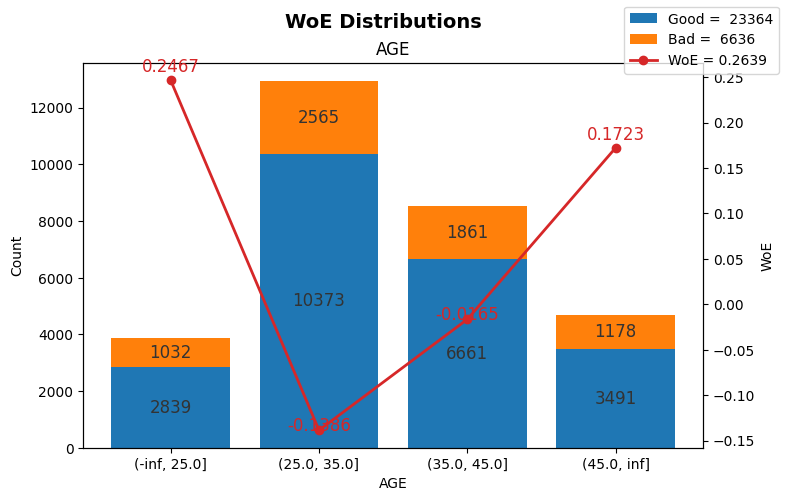

In [34]:
# 根据默认参数，将特征分箱，计算WoE,并展示图形
plot_woe(data,'AGE')

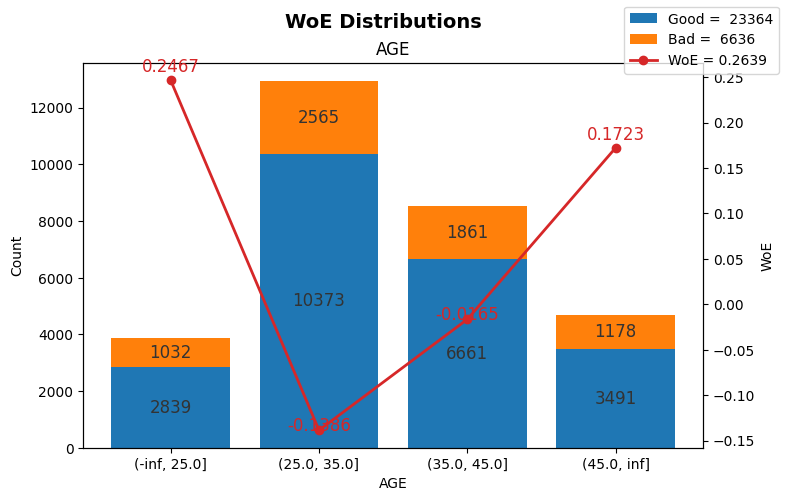

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.25,0.0084,0.0213
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.1267%,38.6528%,44.3974%,19.8253%,-0.14,0.0080,0.0213
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.02,0.0001,0.0213
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.17,0.0048,0.0213


In [35]:
# 根据默认参数，将特征分箱，并计算WoE,并展示图形 和 数据
plot_woe(data,'AGE',return_data =True)

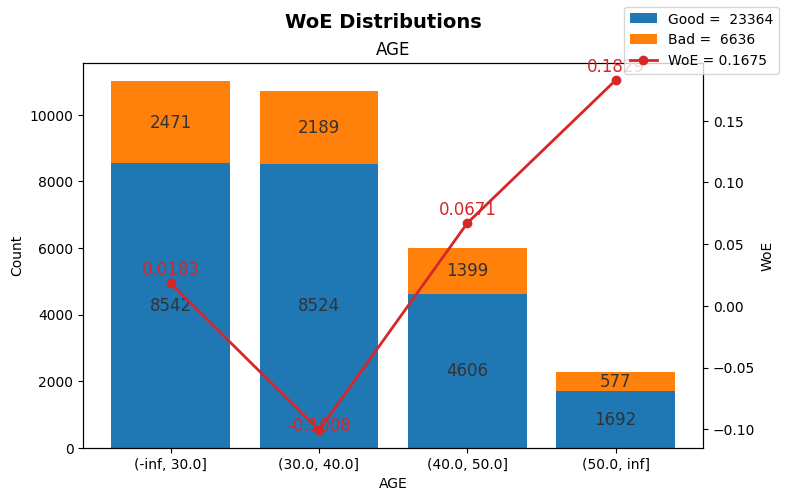

In [36]:
# 根据指定切分点计算WoE,并展示图形
plot_woe(data,'AGE',bins=[-inf,30,40,50,inf])

In [37]:
woe_iv(data,'AGE',bins=[-inf,30,40,50,inf])

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 30.0]",11013,2471,8542,36.7100%,37.2363%,36.5605%,22.4371%,0.0183,0.0001,0.0072
1,AGE,2,"(30.0, 40.0]",10713,2189,8524,35.7100%,32.9867%,36.4835%,20.4331%,-0.1008,0.0035,0.0072
2,AGE,3,"(40.0, 50.0]",6005,1399,4606,20.0167%,21.0820%,19.7141%,23.2973%,0.0671,0.0009,0.0072
3,AGE,4,"(50.0, inf]",2269,577,1692,7.5633%,8.6950%,7.2419%,25.4297%,0.1829,0.0027,0.0072


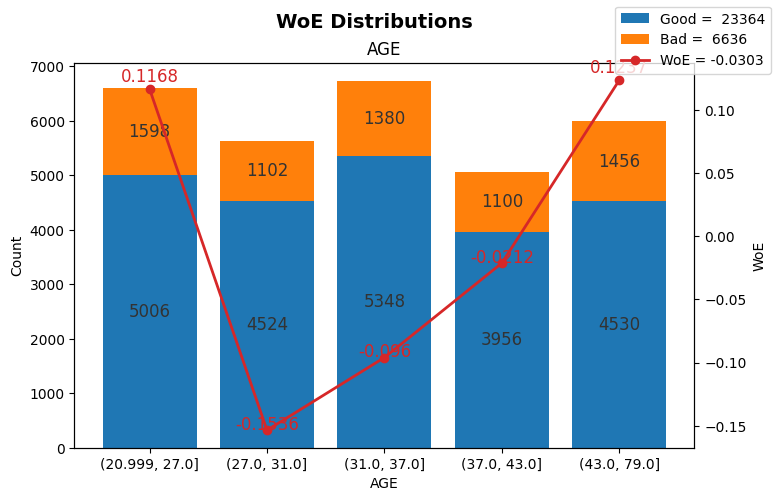

In [38]:
# 根据等频分箱，将特征分为5箱，并计算WoE,并展示图形
plot_woe(data,'AGE',qcut=5)

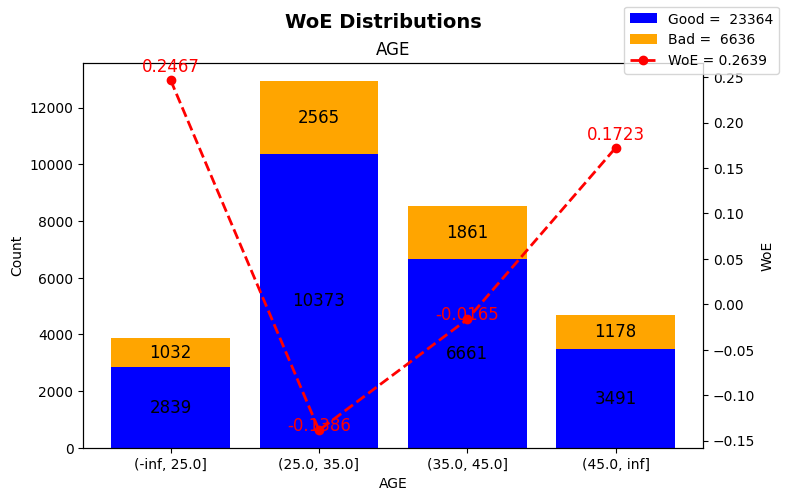

In [39]:
# 根据默认的决策树方法分箱，并计算WoE,设置图形的颜色和样式，并展示图形
plot_woe(data,'AGE',color=['blue','orange','red','black'],linewidth=2,linestyle='--')

## 计算 IV 并绘图

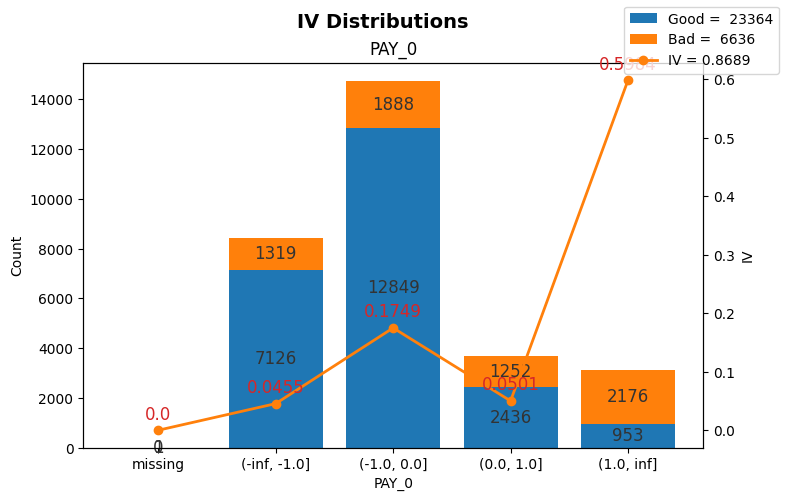

In [40]:
# 根据默认的决策树方法分箱，并计算IV，展示图形
plot_iv(data,'PAY_0')

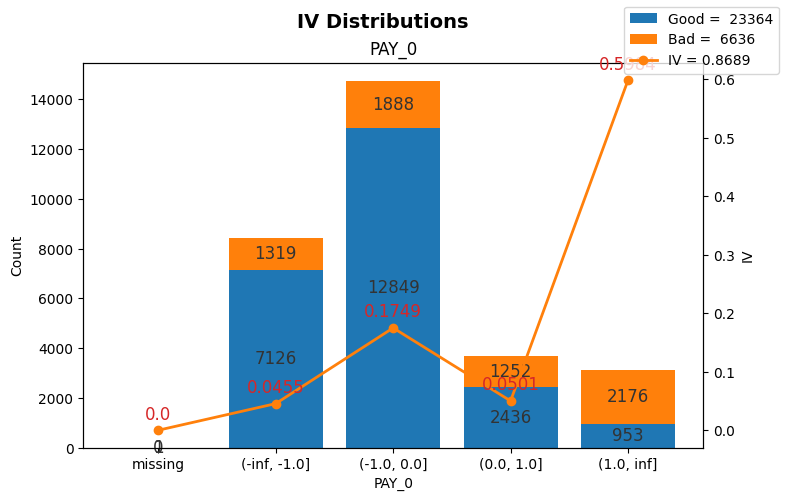

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,missing,1,1,0,0.0033%,0.0151%,0.0000%,100.0000%,0.0000,0.00,0.87
1,PAY_0,2,"(-inf, -1.0]",8445,1319,7126,28.1500%,19.8764%,30.4999%,15.6187%,-0.4282,0.05,0.87
2,PAY_0,3,"(-1.0, 0.0]",14737,1888,12849,49.1233%,28.4509%,54.9949%,12.8113%,-0.6591,0.17,0.87
3,PAY_0,4,"(0.0, 1.0]",3688,1252,2436,12.2933%,18.8668%,10.4263%,33.9479%,0.5931,0.05,0.87
4,PAY_0,5,"(1.0, inf]",3129,2176,953,10.4300%,32.7908%,4.0789%,69.5430%,2.0843,0.60,0.87


In [41]:
# 根据默认的决策树方法分箱，并计算IV，展示图形 和 数据
plot_iv(data,'PAY_0',return_data=True)

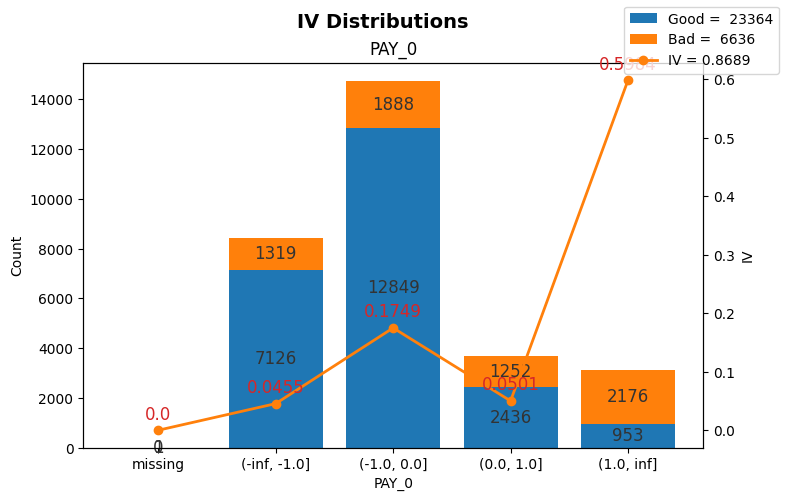

In [42]:
# 根据决策树方法分箱，并计算IV，展示图形
plot_iv(data,'PAY_0',method='tree')

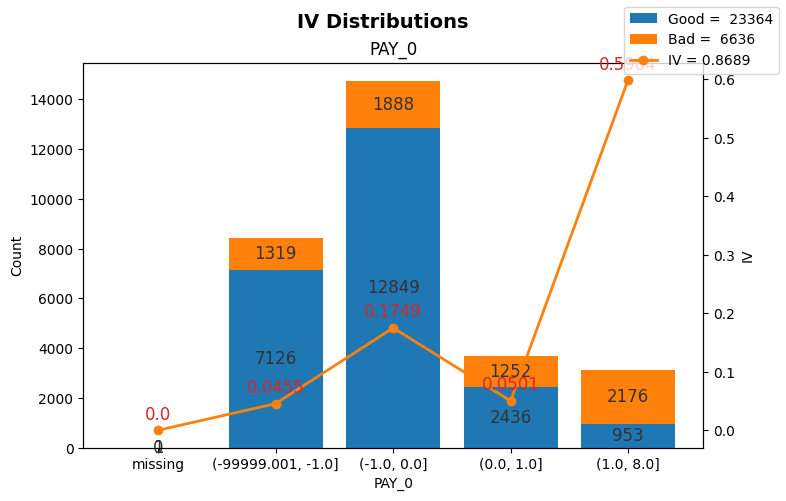

In [43]:
# 根据等频分箱，将特征分为5箱，并计算IV,展示图形
plot_iv(data,'PAY_0',qcut=5)

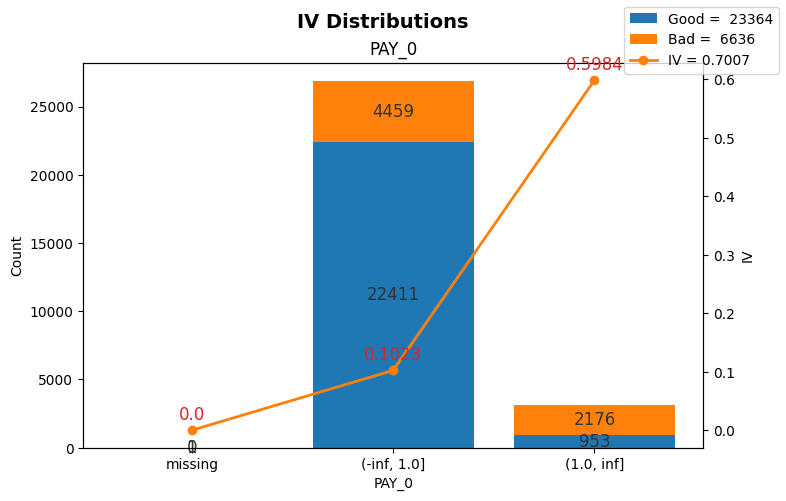

In [44]:
# 根据指定的切分点，将特征分箱，并计算IV,展示图形
plot_iv(data,'PAY_0',bins=[-inf,1,inf])

### 获取列的数据类型，离散型、连续型

In [45]:
col_types = get_col_type(data)
col_types

,Name,Type
0,ID,continuous
1,LIMIT_BAL,continuous
2,SEX,continuous
3,EDUCATION,continuous
4,MARRIAGE,continuous
5,AGE,continuous
6,PAY_0,continuous
7,PAY_2,continuous
8,PAY_3,continuous
9,PAY_4,continuous


## 决策树分箱

In [46]:
# 根据决策树方法，获取特征的分箱切分点结果
tree_bins(data, 'AGE', max_leaf_nodes=4,min_samples_leaf=0.05)

[-inf, 25.0, 35.0, 45.0, inf]

## 批量决策树分箱

In [47]:
data_bins = get_data_bins(data,max_leaf_nodes=4)
data_bins

,Name,Bins
0,ID,"[-inf, 15947.0, 18455.0, 26441.0, inf]"
1,LIMIT_BAL,"[-inf, 40000.0, 140000.0, 360000.0, inf]"
2,SEX,"[-inf, 1.0, inf]"
3,EDUCATION,"[-inf, 1.0, 2.0, inf]"
4,MARRIAGE,"[-inf, 1.0, inf]"
5,AGE,"[-inf, 25.0, 35.0, 45.0, inf]"
6,PAY_0,"[-inf, -1.0, 0.0, 1.0, inf]"
7,PAY_2,"[-inf, -2.0, -1.0, 1.0, inf]"
8,PAY_3,"[-inf, -2.0, -1.0, 1.0, inf]"
9,PAY_4,"[-inf, -2.0, -1.0, 0.0, inf]"


## 手动调整分箱

In [48]:
data_bins_adjust = update_bins(data_bins,
[
['AGE',[-inf,20,30,40,50,inf]],
['BILL_AMT1',[-inf,1000,8000,50000,inf]],
])
data_bins_adjust

,Name,Bins
0,ID,"[-inf, 15947.0, 18455.0, 26441.0, inf]"
1,LIMIT_BAL,"[-inf, 40000.0, 140000.0, 360000.0, inf]"
2,SEX,"[-inf, 1.0, inf]"
3,EDUCATION,"[-inf, 1.0, 2.0, inf]"
4,MARRIAGE,"[-inf, 1.0, inf]"
5,AGE,"[-inf, 20, 30, 40, 50, inf]"
6,PAY_0,"[-inf, -1.0, 0.0, 1.0, inf]"
7,PAY_2,"[-inf, -2.0, -1.0, 1.0, inf]"
8,PAY_3,"[-inf, -2.0, -1.0, 1.0, inf]"
9,PAY_4,"[-inf, -2.0, -1.0, 0.0, inf]"


## 数据离散化

In [49]:
# 根据决策树分箱，并将数据离散化
data_discrete(data)

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(-inf, 15947.0]","(-inf, 40000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 25.0]",missing,"(1.0, inf]","(-2.0, -1.0]","(-2.0, -1.0]","(-inf, -2.0]","(-inf, -2.0]","(782.0, 12420.0]","(-inf, 10507.0]","(464.0, 12075.0]","(-inf, 787.0]","(-inf, 390.0]","(-inf, 420.0]","(-inf, 21.0]","(90.0, 4979.0]","(-inf, 17.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 1.0]",1
1,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(25.0, 35.0]","(-inf, -1.0]","(1.0, inf]","(-1.0, 1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(0.0, inf]","(782.0, 12420.0]","(-inf, 10507.0]","(464.0, 12075.0]","(787.0, 16643.0]","(390.0, 12541.0]","(420.0, 12655.0]","(-inf, 21.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(-inf, 0.0]","(1.0, 2000.0]",1
2,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(25.0, 35.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(-1.0, 0.0]","(12420.0, 54404.0]","(10507.0, 35009.0]","(12075.0, 50614.0]","(787.0, 16643.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(0.0, 2000.0]","(2000.0, 9844.0]",0
3,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(35.0, 45.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(-1.0, 0.0]","(12420.0, 54404.0]","(35009.0, 92367.0]","(12075.0, 50614.0]","(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(0.0, 2000.0]","(1.0, 2000.0]",0
4,"(-inf, 15947.0]","(40000.0, 140000.0]","(-inf, 1.0]","(1.0, 2.0]","(-inf, 1.0]","(45.0, inf]","(-inf, -1.0]","(-1.0, 1.0]","(-2.0, -1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(-1.0, 0.0]","(782.0, 12420.0]","(-inf, 10507.0]","(12075.0, 50614.0]","(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(15000.0, inf]","(4640.0, 16883.0]","(4327.0, inf]","(0.0, 2000.0]","(1.0, 2000.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,"(26441.0, inf]","(140000.0, 360000.0]","(-inf, 1.0]","(2.0, inf]","(-inf, 1.0]","(35.0, 45.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(-1.0, 0.0]","(54404.0, inf]","(92367.0, inf]","(50614.0, inf]","(79181.0, inf]","(12541.0, 51044.0]","(12655.0, 51106.0]","(4550.0, 17580.0]","(15000.0, inf]","(4640.0, 16883.0]","(1900.0, 4327.0]","(2000.0, 9980.0]","(1.0, 2000.0]",0
29996,"(26441.0, inf]","(140000.0, 360000.0]","(-inf, 1.0]","(2.0, inf]","(1.0, inf]","(35.0, 45.0]","(-inf, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(782.0, 12420.0]","(-inf, 10507.0]","(464.0, 12075.0]","(787.0, 16643.0]","(390.0, 12541.0]","(-inf, 420.0]","(21.0, 4550.0]","(90.0, 4979.0]","(4640.0, 16883.0]","(0.0, 1900.0]","(-inf, 0.0]","(-inf, 1.0]",0
29997,"(26441.0, inf]","(-inf, 40000.0]","(-inf, 1.0]","(1.0, 2.0]","(1.0, inf]","(35.0, 45.0]","(1.0, inf]","(1.0, inf]","(1.0, inf]","(-2.0, -1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(782.0, 12420.0]","(-inf, 10507.0]","(464.0, 12075.0]","(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(-inf, 21.0]","(-inf, 90.0]","(16883.0, inf]","(1900.0, 4327.0]","(0.0, 2000.0]","(2000.0, 9844.0]",1
29998,"(26441.0, inf]","(40000.0, 140000.0]","(-inf, 1.0]","(2.0, inf]","(-inf, 1.0]","(35.0, 45.0]","(0.0, 1.0]","(-2.0, -1.0]","(-1.0, 1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(-2.0, -1.0]","(-inf, 782.0]","(35009.0, 92367.0]","(50614.0, inf]","(16643.0, 79181.0]","(390.0, 12541.0]","(12655.0, 51106.0]","(17580.0, inf]","(90.0, 4979.0]","(17.0, 4640.0]","(1900.0, 4327.0]","(9980.0, inf]","(1.0, 2000.0]",1


In [50]:
# 按照调整后的分箱结果进行离散化
data_train_discrete = data_discrete(data_train,col_bin = data_bins_adjust)
data_train_discrete.head()

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(18455.0, 26441.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(20.0, 30.0]","(-inf, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(1000.0, 8000.0]","(-inf, 10507.0]","(-inf, 464.0]","(79181.0, inf]","(51044.0, inf]","(51106.0, inf]","(21.0, 4550.0]","(90.0, 4979.0]","(16883.0, inf]","(1900.0, 4327.0]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
1,"(-inf, 15947.0]","(140000.0, 360000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(20.0, 30.0]","(-inf, -1.0]","(-inf, -2.0]","(-inf, -2.0]","(-inf, -2.0]","(-inf, -2.0]","(-inf, -2.0]","(50000.0, inf]","(-inf, 10507.0]","(464.0, 12075.0]","(79181.0, inf]","(390.0, 12541.0]","(420.0, 12655.0]","(21.0, 4550.0]","(90.0, 4979.0]","(16883.0, inf]","(4327.0, inf]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
2,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(-inf, 1.0]","(1.0, inf]","(20.0, 30.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(-1.0, 0.0]","(8000.0, 50000.0]","(10507.0, 35009.0]","(12075.0, 50614.0]","(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
3,"(26441.0, inf]","(-inf, 40000.0]","(-inf, 1.0]","(2.0, inf]","(1.0, inf]","(20.0, 30.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]","(0.0, inf]","(0.0, inf]","(8000.0, 50000.0]","(10507.0, 35009.0]","(12075.0, 50614.0]","(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(-inf, 0.0]","(0.0, 2000.0]","(-inf, 1.0]",0
4,"(18455.0, 26441.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(30.0, 40.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]","(-1.0, 0.0]","(-1.0, 0.0]","(8000.0, 50000.0]","(35009.0, 92367.0]","(12075.0, 50614.0]","(16643.0, 79181.0]","(51044.0, inf]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(1900.0, 4327.0]","(0.0, 2000.0]","(1.0, 2000.0]",0


## WOE 转换

In [51]:
# 使用已经离散化的数据，批量进行WoE转换
data_train_woe = woe_transform(data_train_discrete)
data_train_woe.head()

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,-0.17,0.15,-0.07,0.09,0.07,0.01,-0.42,-0.38,-0.43,-0.38,-0.20,-0.19,-0.04,-0.01,0.09,-0.12,-0.13,-0.11,-0.02,0.00,-0.88,-0.16,-0.22,-0.25,0
1,0.02,-0.35,-0.07,0.09,-0.06,0.01,-0.42,-0.23,-0.21,-0.16,-0.14,-0.10,-0.12,-0.01,-0.09,-0.12,-0.15,-0.17,-0.02,0.00,-0.88,-0.47,-0.22,-0.25,0
2,0.02,0.15,-0.07,-0.18,-0.06,0.01,-0.65,-0.40,-0.30,-0.24,-0.20,-0.19,0.07,0.16,0.12,0.10,0.15,0.15,-0.02,0.00,-0.02,0.06,-0.22,-0.25,0
3,0.06,0.69,0.10,0.07,-0.06,0.01,-0.65,-0.40,-0.30,-0.24,1.46,1.33,0.07,0.16,0.12,0.10,0.15,0.15,-0.02,0.00,-0.02,0.46,0.06,0.37,0
4,-0.17,0.15,-0.07,0.09,0.07,-0.10,-0.65,-0.40,-0.30,-0.24,-0.20,-0.19,0.07,-0.03,0.12,0.10,-0.13,0.15,-0.02,0.00,-0.02,-0.16,0.06,0.08,0


In [52]:
## 指定 criterion='discrete'，使用已经离散化的列计算WoE和IV
woe_iv(data_train_discrete, 'AGE',method='discrete')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(20.0, 30.0]",8289,1832,6457,36.8400%,37.1151%,36.7627%,22.1016%,0.0095,0.0000,0.0066
1,AGE,2,"(30.0, 40.0]",7990,1626,6364,35.5111%,32.9417%,36.2332%,20.3504%,-0.0952,0.0031,0.0066
2,AGE,3,"(40.0, 50.0]",4514,1053,3461,20.0622%,21.3331%,19.7051%,23.3274%,0.0794,0.0013,0.0066
3,AGE,4,"(50.0, inf]",1707,425,1282,7.5867%,8.6102%,7.2990%,24.8975%,0.1652,0.0022,0.0066


## 批量计算全部特征的IV

In [53]:
# 使用默认的决策树分箱方法，批量计算数据集所有变量的IV
df_iv = data_iv(data_train)  
df_iv

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.8647
7,PAY_2,0.5272
8,PAY_3,0.4134
9,PAY_4,0.3510
10,PAY_5,0.3213
11,PAY_6,0.2759
18,PAY_AMT1,0.1778
1,LIMIT_BAL,0.1650
19,PAY_AMT2,0.1634
20,PAY_AMT3,0.1233


## 根据离散化的数据，批量计算IV

In [54]:
# 根据离散化的数据，批量计算IV
df_iv = data_iv(data_train_discrete,method='discrete',precision=4)  
df_iv

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.8647
7,PAY_2,0.5272
8,PAY_3,0.4134
9,PAY_4,0.3510
10,PAY_5,0.3213
11,PAY_6,0.2759
18,PAY_AMT1,0.1767
1,LIMIT_BAL,0.1676
19,PAY_AMT2,0.1602
20,PAY_AMT3,0.1239


## 通过最小IV >= 0.02 和最大相关性 <=0.6 筛选特征

In [55]:
# 通过最小IV >= 0.02 和最大相关性 <=0.6 筛选特征
# 只返回筛选后保留的特征
iv_corr(data_train,df_iv,min_iv = 0.02,max_corr = 0.6)

['LIMIT_BAL',
 'PAY_0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

## 通过最小IV >= 0.1 筛选特征

In [56]:
iv_corr(data_train,df_iv,min_iv = 0.1,max_corr=1)

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4']

## 通过最小IV >= 0.02 和最大相关性 <=0.6 筛选特征，并返回删除的特征

In [57]:
# 返回筛选后保留的特征、根据IV删除的特征、根据corr删除的特征、相关矩阵
col_keep,col_drop_by_iv,col_drop_by_corr,iv_corr_result = iv_corr(data_train,df_iv,min_iv = 0.02,max_corr=0.5,return_drop=True)
col_keep

['LIMIT_BAL',
 'PAY_0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [58]:
#根据IV删除的特征
col_drop_by_iv

array(['BILL_AMT5', 'BILL_AMT6', 'ID', 'EDUCATION', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT2', 'BILL_AMT1', 'AGE', 'SEX', 'MARRIAGE'],
      dtype=object)

In [59]:
#根据corr删除的特征
col_drop_by_corr

array(['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT6',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT2', 'BILL_AMT1'], dtype=object)

In [60]:
# IV 和相关性矩阵
iv_corr_result.head()

,Name1,Name2,IV1,IV2,IV1-IV2,Corr
1,PAY_0,PAY_2,0.86,0.53,0.34,0.67
2,PAY_0,PAY_3,0.86,0.41,0.45,0.58
3,PAY_0,PAY_4,0.86,0.35,0.51,0.54
4,PAY_0,PAY_5,0.86,0.32,0.54,0.51
5,PAY_0,PAY_6,0.86,0.28,0.59,0.47


## 逐步回归筛选特征

In [61]:
#逐步回归选择特征
col_result = stepwise_lr(data_train)
col_result

  0%|          | 0/24 [00:00<?, ?it/s]

['PAY_0',
 'PAY_3',
 'PAY_AMT1',
 'LIMIT_BAL',
 'PAY_AMT2',
 'PAY_AMT5',
 'AGE',
 'EDUCATION',
 'BILL_AMT1',
 'BILL_AMT3',
 'MARRIAGE']

In [62]:
#逐步回归选择特征，并显示逐步回归详情
col_result = stepwise_lr(data_train,verbose=True)
col_result

  0%|          | 0/24 [00:00<?, ?it/s]


step 1,current:PAY_2,selected:0.0,max_pvalue:['PAY_0'],pvalue:PAY_2,pvalues:[0.0, 0.0, 0.0]
所有变量都显著

step 2,current:PAY_3,selected:0.0,max_pvalue:['PAY_0', 'PAY_2'],pvalue:PAY_3,pvalues:[0.0, 0.0, 0.0013, 0.0]
所有变量都显著

step 3,current:PAY_4,selected:0.2332,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_4,pvalues:[0.0, 0.0, 0.0019, 0.0, 0.2332]
新变量不显著

step 4,current:PAY_5,selected:0.077,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_5,pvalues:[0.0, 0.0, 0.0031, 0.0, 0.077]
新变量不显著

step 5,current:PAY_6,selected:0.2293,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_6,pvalues:[0.0, 0.0, 0.0022, 0.0, 0.2293]
新变量不显著

step 6,current:PAY_AMT1,selected:0.0,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_AMT1,pvalues:[0.0, 0.0, 0.1064, 0.0, 0.0]
新变量显著，且有老变量不显著
去掉不显著变量后目标函数下降，去掉后的aic:21172.0565,去掉前的aic:21235.9738
2
PAY_2

step 7,current:LIMIT_BAL,selected:0.0,max_pvalue:['PAY_0', 'PAY_3', 'PAY_AMT1'],pvalue:LIMIT_BAL,pvalues:[0.0, 0.0, 0.0, 0.0, 0.0]
所有变量都显著

step 8,current:PAY_AMT2,s

['PAY_0',
 'PAY_3',
 'PAY_AMT1',
 'LIMIT_BAL',
 'PAY_AMT2',
 'PAY_AMT5',
 'AGE',
 'EDUCATION',
 'BILL_AMT1',
 'BILL_AMT3',
 'MARRIAGE']

In [63]:
import statsmodels.api as sm

y = data_train_woe['y']
x = data_train_woe[col_result]
x = sm.add_constant(x)

lr = sm.Logit(y, x).fit(disp=0)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22488
Method:                           MLE   Df Model:                           11
Date:                Fri, 23 Jun 2023   Pseudo R-squ.:                  0.1692
Time:                        01:24:49   Log-Likelihood:                -9834.7
converged:                       True   LL-Null:                       -11838.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2667      0.018    -69.471      0.000      -1.302      -1.231
PAY_0          0.7994      0.021     38.951      0.000       0.759       0.840
PAY_3          0.3891      0.031     12.365      0.000       0.327       0.451
PAY_AMT1       0.3394      0.049      6.915      0.000       0.243       0.436
LIMIT_BAL      0.5285      0.049     10.744      0.000       0.432       0.625
PAY_AMT2       0.1593      0.054      2.926      0.003       0.053       0.266
PAY_AMT5       0.4267      0.069      6.147      0.000       0.291       0.563
AGE            0.3385      0.217      1.561      0.118      -0.086       0.763
EDUCATION     -0.0091      0.153     -0.060      0.953      -0.309       0.291
BILL_AMT1     -0.5630      0.250     -2.249      0.025      -1.054      -0.072
BILL_AMT3     -0.3865      0.210     -1.842      0.066      -0.798       0.025
MARRIAGE       1.3022      0.287      4.537      0.000       0.740       1.865
==============================================================================
"""

## 查看特征相关性图

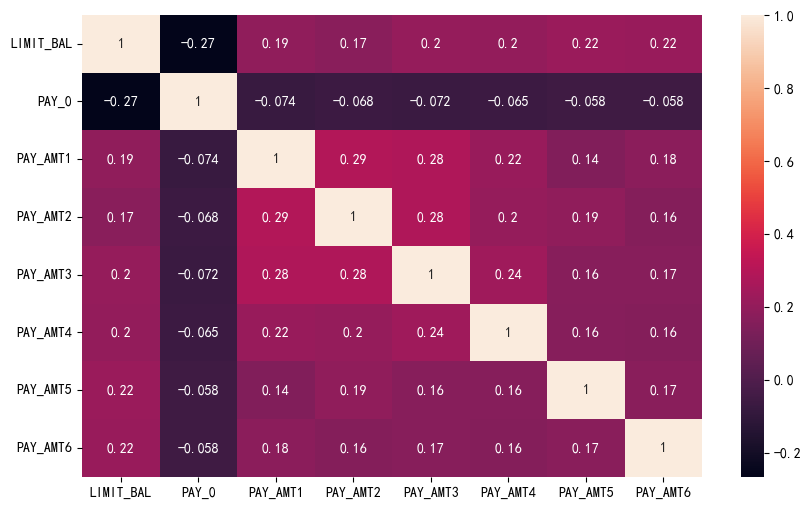

In [64]:
plot_corr(data_train[col_keep])

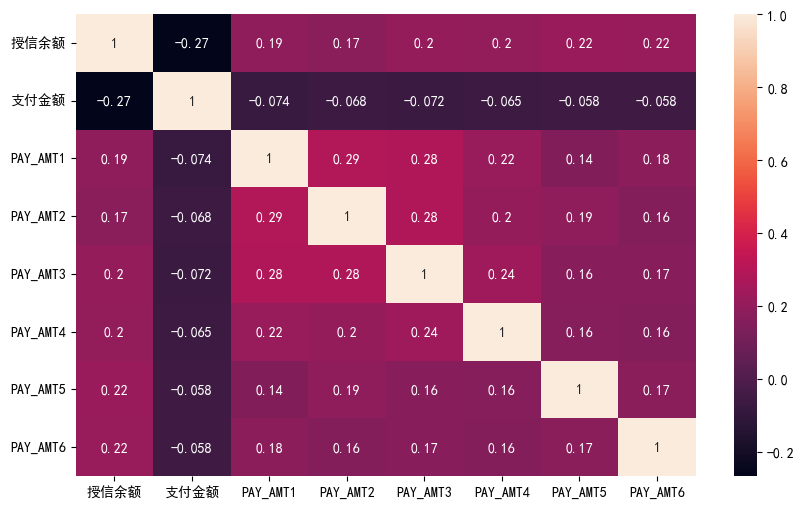

In [65]:
# 相关性表，添加中文
plot_corr(data_train[col_keep],col_dict = col_dict)

In [66]:
# 批量计算WoE，使用默认的决策树分箱方法
data_iv(data,precision=4)  

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.8689
7,PAY_2,0.5469
8,PAY_3,0.4124
9,PAY_4,0.3593
10,PAY_5,0.3337
11,PAY_6,0.2852
18,PAY_AMT1,0.1835
1,LIMIT_BAL,0.1757
19,PAY_AMT2,0.1607
20,PAY_AMT3,0.1262


In [67]:
# 批量计算IV，等频分箱，分为5箱
data_iv(data,qcut=5)  

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.8689
7,PAY_2,0.5417
8,PAY_3,0.4090
9,PAY_4,0.3552
10,PAY_5,0.3293
11,PAY_6,0.2817
1,LIMIT_BAL,0.1553
18,PAY_AMT1,0.1548
19,PAY_AMT2,0.1395
20,PAY_AMT3,0.1168


In [68]:
# 根据分箱后的数据，批量计算iv
data_iv(data_train_discrete)

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.8647
7,PAY_2,0.5272
8,PAY_3,0.4134
9,PAY_4,0.3510
10,PAY_5,0.3213
11,PAY_6,0.2759
18,PAY_AMT1,0.1767
1,LIMIT_BAL,0.1676
19,PAY_AMT2,0.1602
20,PAY_AMT3,0.1239


## 评分卡开发

In [69]:
# 按照默认参数，开发评分卡
# 默认基础分为600，PDO=50

# 输入训练集数据 和 调整后分箱，开发评分卡
scorecard = get_scorecard(data_train[col_keep + ['y']] ,data_bins_adjust)
scorecard

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

,No.,Name,Type,Bins No.,Bin,Bins,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,Intercept,Coef,Base Score,Score
0,1,PAY_0,continuous,1,missing,"[-inf, -1.0, 0.0, 1.0, inf]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.86,-1.27,0.91,600,-0.00
1,1,PAY_0,continuous,2,"(-inf, -1.0]","[-inf, -1.0, 0.0, 1.0, inf]",6288,977,5311,27.95%,19.79%,30.24%,15.54%,-0.42,0.04,0.86,-1.27,0.91,600,28.00
2,1,PAY_0,continuous,3,"(-1.0, 0.0]","[-inf, -1.0, 0.0, 1.0, inf]",11109,1417,9692,49.37%,28.71%,55.18%,12.76%,-0.65,0.17,0.86,-1.27,0.91,600,43.00
3,1,PAY_0,continuous,4,"(0.0, 1.0]","[-inf, -1.0, 0.0, 1.0, inf]",2767,921,1846,12.30%,18.66%,10.51%,33.29%,0.57,0.05,0.86,-1.27,0.91,600,-37.00
4,1,PAY_0,continuous,5,"(1.0, inf]","[-inf, -1.0, 0.0, 1.0, inf]",2336,1621,715,10.38%,32.84%,4.07%,69.39%,2.09,0.60,0.86,-1.27,0.91,600,-137.00
5,2,PAY_AMT1,continuous,1,missing,"[-inf, 21.0, 4550.0, 17580.0, inf]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.18,-1.27,0.14,600,-0.00
6,2,PAY_AMT1,continuous,2,"(-inf, 21.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",4055,1438,2617,18.02%,29.13%,14.90%,35.46%,0.67,0.10,0.18,-1.27,0.14,600,-7.00
7,2,PAY_AMT1,continuous,3,"(21.0, 4550.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",11940,2585,9355,53.07%,52.37%,53.26%,21.65%,-0.02,0.00,0.18,-1.27,0.14,600,0.00
8,2,PAY_AMT1,continuous,4,"(4550.0, 17580.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",5310,798,4512,23.60%,16.17%,25.69%,15.03%,-0.46,0.04,0.18,-1.27,0.14,600,5.00
9,2,PAY_AMT1,continuous,5,"(17580.0, inf]","[-inf, 21.0, 4550.0, 17580.0, inf]",1195,115,1080,5.31%,2.33%,6.15%,9.62%,-0.97,0.04,0.18,-1.27,0.14,600,10.00


In [70]:
# 设置数据精度，并返回逻辑回归模型的详细内容
scorecard,lr,a,b = get_scorecard(data_train[col_keep + ['y']] ,data_bins_adjust,precision=4,return_lr=True)
scorecard.to_excel('scorecard.xlsx')

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [71]:
# 查看逻辑回归模型的详细内容
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22491
Method:                           MLE   Df Model:                            8
Date:                Fri, 23 Jun 2023   Pseudo R-squ.:                  0.1615
Time:                        01:24:58   Log-Likelihood:                -9925.5
converged:                       True   LL-Null:                       -11838.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2731      0.018    -70.247      0.000      -1.309      -1.238
LIMIT_BAL      0.5425      0.045     11.958      0.000       0.454       0.631
PAY_0          0.9110      0.019     48.360      0.000       0.874       0.948
PAY_AMT1       0.1443      0.050      2.912      0.004       0.047       0.241
PAY_AMT2       0.2597      0.053      4.855      0.000       0.155       0.364
PAY_AMT3       0.2203      0.062      3.542      0.000       0.098       0.342
PAY_AMT4       0.1442      0.071      2.035      0.042       0.005       0.283
PAY_AMT5       0.1869      0.073      2.546      0.011       0.043       0.331
PAY_AMT6       0.0598      0.074      0.807      0.420      -0.085       0.205
==============================================================================
"""

## 获取模型变量的IV表单

In [72]:
#获取模型变量的IV表单
model_iv(data_train_discrete[col_keep+['y']])  

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

,No.,Name,Bins No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,1,PAY_0,1,missing,0,0,0,0.0000%,0.0000%,0.0000%,0.0000%,0.00,0.0000,0.86
1,1,PAY_0,2,"(-inf, -1.0]",6288,977,5311,27.9467%,19.7934%,30.2380%,15.5375%,-0.42,0.0443,0.86
2,1,PAY_0,3,"(-1.0, 0.0]",11109,1417,9692,49.3733%,28.7075%,55.1811%,12.7554%,-0.65,0.1730,0.86
3,1,PAY_0,4,"(0.0, 1.0]",2767,921,1846,12.2978%,18.6588%,10.5101%,33.2851%,0.57,0.0468,0.86
4,1,PAY_0,5,"(1.0, inf]",2336,1621,715,10.3822%,32.8404%,4.0708%,69.3921%,2.09,0.6007,0.86
5,2,PAY_AMT1,1,missing,0,0,0,0.0000%,0.0000%,0.0000%,0.0000%,0.00,0.0000,0.18
6,2,PAY_AMT1,2,"(-inf, 21.0]",4055,1438,2617,18.0222%,29.1329%,14.8998%,35.4624%,0.67,0.0954,0.18
7,2,PAY_AMT1,3,"(21.0, 4550.0]",11940,2585,9355,53.0667%,52.3703%,53.2624%,21.6499%,-0.02,0.0002,0.18
8,2,PAY_AMT1,4,"(4550.0, 17580.0]",5310,798,4512,23.6000%,16.1669%,25.6889%,15.0282%,-0.46,0.0441,0.18
9,2,PAY_AMT1,5,"(17580.0, inf]",1195,115,1080,5.3111%,2.3298%,6.1489%,9.6234%,-0.97,0.0371,0.18


## 检查VIF

In [73]:
get_vif(data_train_woe,data_train_woe.columns,return_data=True)

(2.97,
     variables  VIF
 0          ID 1.02
 1   LIMIT_BAL 1.48
 2         SEX 1.02
 3   EDUCATION 1.12
 4    MARRIAGE 1.06
 5         AGE 1.03
 6       PAY_0 1.95
 7       PAY_2 2.91
 8       PAY_3 2.73
 9       PAY_4 2.78
 10      PAY_5 2.97
 11      PAY_6 2.17
 12  BILL_AMT1 1.94
 13  BILL_AMT2 1.90
 14  BILL_AMT3 2.10
 15  BILL_AMT4 1.56
 16  BILL_AMT5 2.30
 17  BILL_AMT6 1.93
 18   PAY_AMT1 1.90
 19   PAY_AMT2 1.89
 20   PAY_AMT3 1.91
 21   PAY_AMT4 2.07
 22   PAY_AMT5 1.82
 23   PAY_AMT6 1.68)

In [74]:
# 查看评分卡模型的参数
print('a:',a,'','b:',b)

a: 508.4396430011438  b: 72.13475204444818


## 预测模型分数

In [75]:
# 预测训练集模型分数
data_train_score = get_predict_score(data_train,scorecard)
data_train_score

  0%|          | 0/8 [00:00<?, ?it/s]

,PAY_0,PAY_0_Score,PAY_AMT1,PAY_AMT1_Score,LIMIT_BAL,LIMIT_BAL_Score,PAY_AMT2,PAY_AMT2_Score,PAY_AMT3,PAY_AMT3_Score,PAY_AMT4,PAY_AMT4_Score,PAY_AMT5,PAY_AMT5_Score,PAY_AMT6,PAY_AMT6_Score,y,Score,Proba
0,-1,28.00,1671.00,0.00,120000.00,-6.00,380.00,-0.00,131062.00,14.00,2000.00,2.00,3000.00,3.00,3000.00,1.00,0,642.00,0.14
1,-2,28.00,1468.00,0.00,200000.00,14.00,2321.00,-0.00,163597.00,14.00,6680.00,5.00,3963.00,3.00,2514.00,1.00,0,665.00,0.10
2,0,43.00,4038.00,0.00,80000.00,-6.00,3199.00,-0.00,914.00,0.00,850.00,-1.00,2055.00,3.00,8318.00,1.00,0,640.00,0.14
3,0,43.00,1596.00,0.00,20000.00,-27.00,2000.00,-0.00,3000.00,0.00,0.00,-5.00,1600.00,-1.00,0.00,-2.00,0,608.00,0.20
4,0,43.00,3000.00,0.00,90000.00,-6.00,2000.00,-0.00,2000.00,0.00,2000.00,2.00,2000.00,-1.00,1087.00,-0.00,0,638.00,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,2,-137.00,3000.00,0.00,50000.00,-6.00,2525.00,-0.00,3900.00,0.00,0.00,-5.00,2000.00,-1.00,4500.00,1.00,1,452.00,0.69
22496,-1,28.00,0.00,-7.00,210000.00,14.00,358.00,-0.00,12816.00,7.00,0.00,-5.00,102.00,-1.00,210.00,-0.00,0,636.00,0.15
22497,1,-38.00,0.00,-7.00,390000.00,28.00,1266.00,-0.00,0.00,-8.00,0.00,-5.00,0.00,-5.00,0.00,-2.00,0,563.00,0.32
22498,0,43.00,1700.00,0.00,30000.00,-27.00,1600.00,-0.00,1287.00,0.00,1296.00,-1.00,500.00,-1.00,1550.00,-0.00,0,614.00,0.19


In [76]:
# 预测测试集模型分数
data_test_score = get_predict_score(data_test,scorecard)
data_test_score

  0%|          | 0/8 [00:00<?, ?it/s]

,PAY_0,PAY_0_Score,PAY_AMT1,PAY_AMT1_Score,LIMIT_BAL,LIMIT_BAL_Score,PAY_AMT2,PAY_AMT2_Score,PAY_AMT3,PAY_AMT3_Score,PAY_AMT4,PAY_AMT4_Score,PAY_AMT5,PAY_AMT5_Score,PAY_AMT6,PAY_AMT6_Score,y,Score,Proba
0,-2,28.00,0.00,-7.00,400000.00,28.00,0.00,-11.00,0.00,-8.00,0.00,-5.00,0.00,-5.00,0.00,-2.00,0,621.00,0.18
1,0,43.00,2600.00,0.00,80000.00,-6.00,4300.00,-0.00,2000.00,0.00,2000.00,2.00,2000.00,-1.00,2000.00,-0.00,0,641.00,0.14
2,1,-38.00,0.00,-7.00,200000.00,14.00,2317.00,-0.00,7588.00,7.00,7614.00,5.00,14053.00,9.00,0.00,-2.00,0,591.00,0.25
3,-1,28.00,1087.00,0.00,20000.00,-27.00,1140.00,-0.00,0.00,-8.00,7014.00,5.00,800.00,-1.00,0.00,-2.00,0,598.00,0.23
4,2,-137.00,5000.00,5.00,70000.00,-6.00,3000.00,-0.00,2000.00,0.00,3000.00,2.00,5000.00,3.00,0.00,-2.00,0,468.00,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,43.00,1128.00,0.00,500000.00,28.00,1000.00,-0.00,0.00,-8.00,8479.00,5.00,236.00,-1.00,2990.00,1.00,0,671.00,0.10
7496,0,43.00,8080.00,5.00,110000.00,-6.00,14298.00,8.00,2519.00,0.00,6616.00,5.00,1953.00,-1.00,5300.00,1.00,0,658.00,0.12
7497,0,43.00,4539.00,0.00,150000.00,14.00,4218.00,-0.00,4204.00,0.00,3296.00,2.00,3408.00,3.00,3416.00,1.00,0,666.00,0.10
7498,0,43.00,5059.00,5.00,140000.00,-6.00,14659.00,8.00,5000.00,7.00,8000.00,5.00,5000.00,3.00,10000.00,3.00,0,671.00,0.10


## 计算AUC 和 KS

  0%|          | 0/8 [00:00<?, ?it/s]

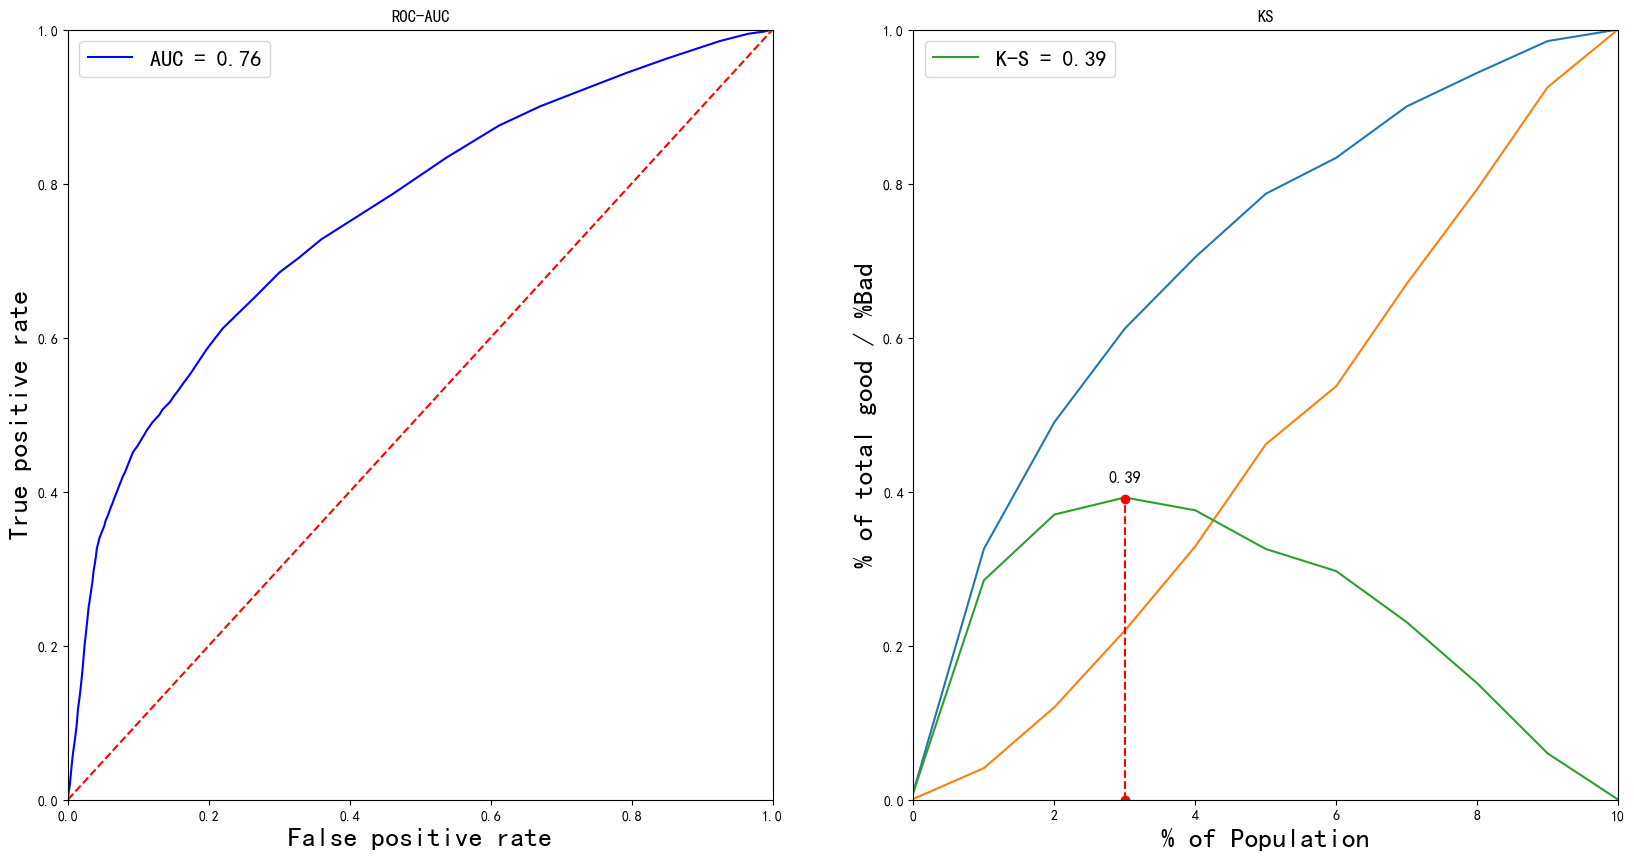

In [77]:
plot_roc_ks(data_train,scorecard)

## 根据 预测得分计算ks

  0%|          | 0/8 [00:00<?, ?it/s]

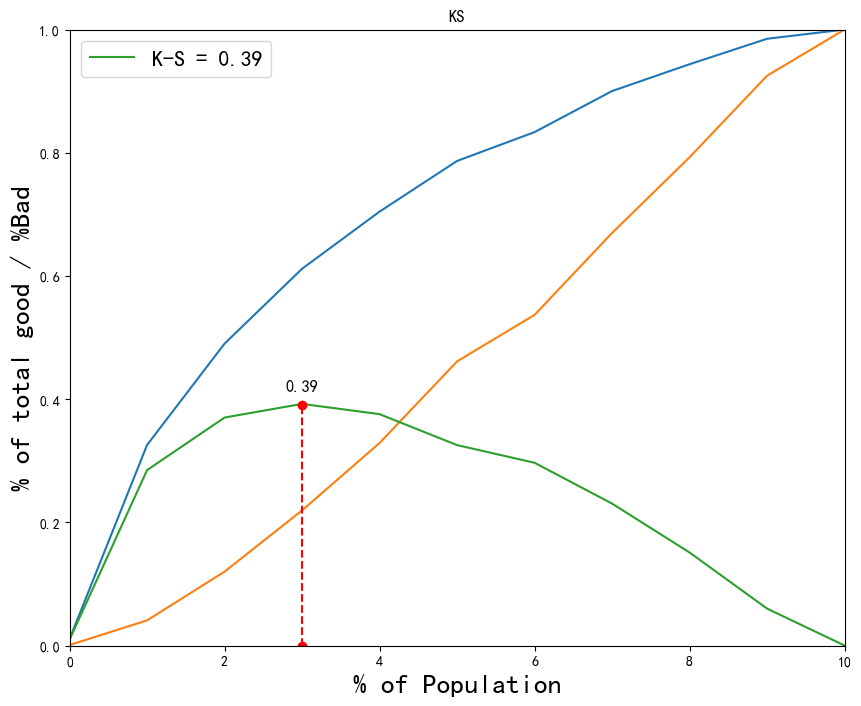

In [78]:
data_proba = get_predict_score(data_train,
                                       scorecard,
                                       init_score=600,
                                       pdo=50,
                                       odds=0,
                                       target='y',
                                       precision=2)


plot_ks(data_train,data_proba)

  0%|          | 0/8 [00:00<?, ?it/s]

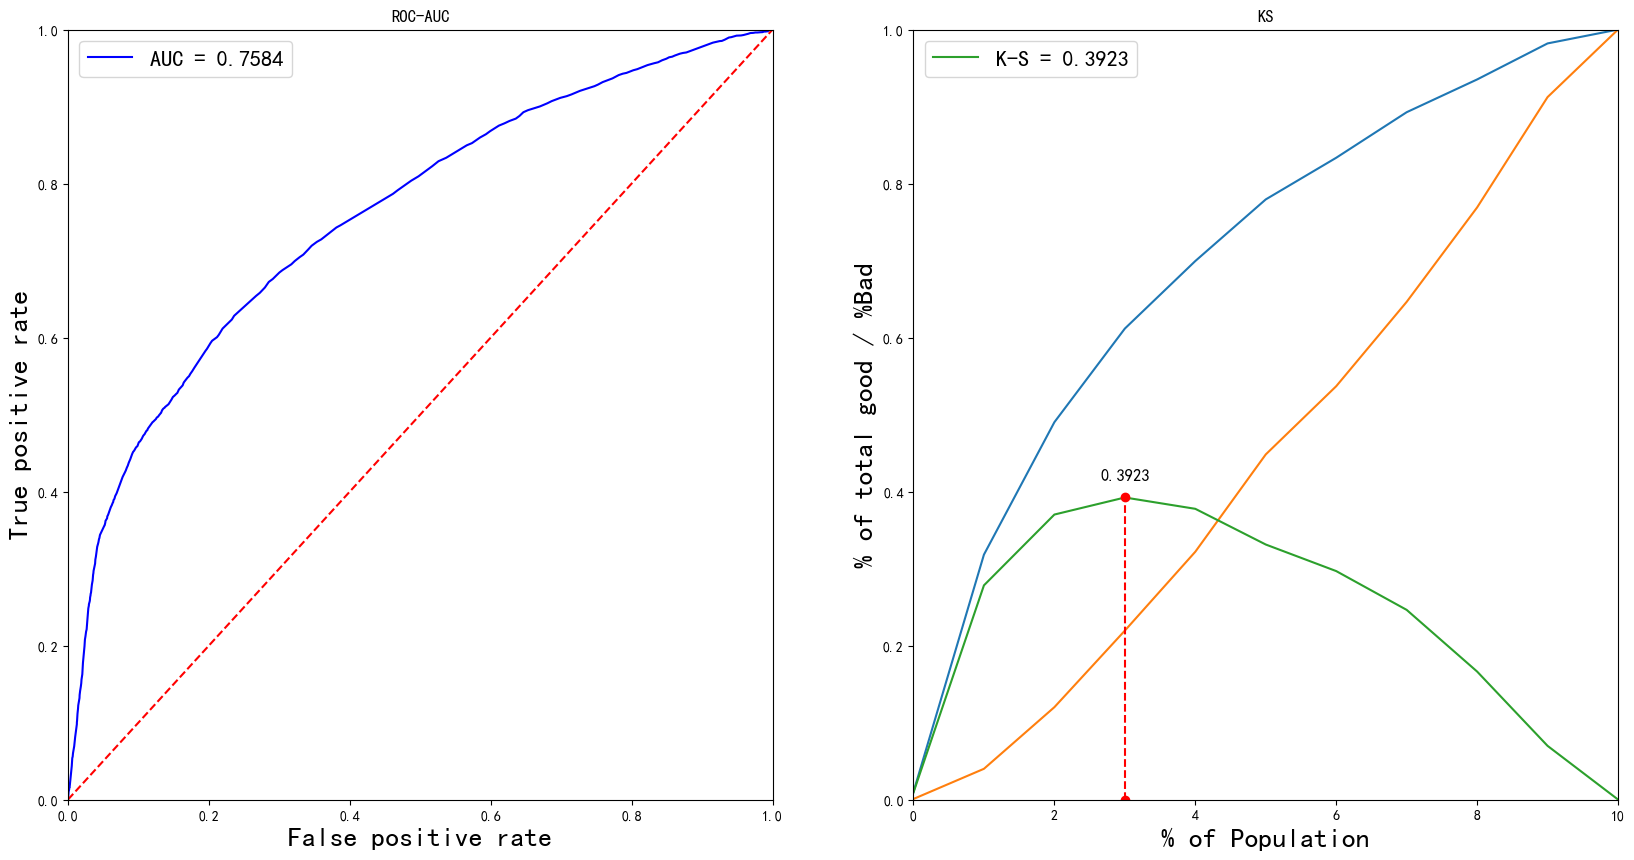

,No.,fpr,tpr,thresholds,ks
0,1,0.00,0.01,0.82,0.01
1,2,0.04,0.32,0.51,0.28
2,3,0.12,0.49,0.31,0.37
3,4,0.22,0.61,0.20,0.39
4,5,0.32,0.70,0.17,0.38
5,6,0.45,0.78,0.15,0.33
6,7,0.54,0.83,0.14,0.30
7,8,0.65,0.89,0.12,0.25
8,9,0.77,0.94,0.10,0.17
9,10,0.91,0.98,0.08,0.07


In [79]:
# 计算auc 和 ks，并返回 ks 结果数据
plot_roc_ks(data_train,scorecard,return_data=True,precision=4)

## AUC 计算

In [80]:
#根据训练集和评分卡计算auc
get_auc_by_card(data_train,scorecard)

  0%|          | 0/8 [00:00<?, ?it/s]

0.76

In [81]:
#根据训练集预测得分，计算auc
get_auc(data_train_score)

0.76

## KS 计算

In [82]:
#根据训练集和评分卡计算ks
get_ks_by_card(data_train,scorecard)

  0%|          | 0/8 [00:00<?, ?it/s]

0.39

In [83]:
#根据训练集预测得分，计算ks
get_ks(data_train_score)

0.39

In [84]:
#根据训练集预测得分，计算ks，并返回数据
ks,ks_data = get_ks(data_train_score,return_data=True)
ks_data

,No.,Proba,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%CumBad,%CumGood,KS
0,1,"(0.039, 0.08]",2834,187,2647,12.60%,3.79%,15.07%,6.60%,3.79%,15.07%,0.11
1,2,"(0.08, 0.1]",2360,206,2154,10.49%,4.17%,12.26%,8.73%,7.96%,27.33%,0.19
2,3,"(0.1, 0.12]",2245,223,2022,9.98%,4.52%,11.51%,9.93%,12.48%,38.85%,0.26
3,4,"(0.12, 0.14]",3076,437,2639,13.67%,8.85%,15.03%,14.21%,21.33%,53.87%,0.33
4,5,"(0.14, 0.15]",2080,292,1788,9.24%,5.92%,10.18%,14.04%,27.25%,64.05%,0.37
5,6,"(0.15, 0.17]",1260,213,1047,5.60%,4.32%,5.96%,16.90%,31.56%,70.01%,0.38
6,7,"(0.17, 0.2]",2296,490,1806,10.20%,9.93%,10.28%,21.34%,41.49%,80.29%,0.39
7,8,"(0.2, 0.31]",1894,488,1406,8.42%,9.89%,8.01%,25.77%,51.38%,88.30%,0.37
8,9,"(0.31, 0.511]",2205,844,1361,9.80%,17.10%,7.75%,38.28%,68.48%,96.05%,0.28
9,10,"(0.511, 0.82]",2250,1556,694,10.00%,31.52%,3.95%,69.16%,100.00%,100.00%,0.00


## 查看评分卡分数分布 和 提升度

In [85]:
# 查看训练集评分卡分数分布 和 提升度
score_dist(data_train_score)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 503.9]",2250,1556,694,10.00%,31.52%,3.95%,69.16%,21.94%,69.16%,10.00%,6.92
1,2,"(503.9, 567.0]",2276,863,1413,10.12%,17.48%,8.04%,37.92%,21.94%,53.45%,20.12%,2.66
2,3,"(567.0, 610.0]",2346,600,1746,10.43%,12.16%,9.94%,25.58%,21.94%,43.93%,30.54%,1.44
3,4,"(610.0, 624.0]",2232,433,1799,9.92%,8.77%,10.24%,19.40%,21.94%,37.92%,40.46%,0.94
4,5,"(624.0, 635.0]",2615,395,2220,11.62%,8.00%,12.64%,15.11%,21.94%,32.83%,52.08%,0.63
5,6,"(635.0, 642.0]",1823,267,1556,8.10%,5.41%,8.86%,14.65%,21.94%,30.38%,60.19%,0.50
6,7,"(642.0, 653.0]",2216,292,1924,9.85%,5.92%,10.95%,13.18%,21.94%,27.96%,70.04%,0.40
7,8,"(653.0, 666.0]",2364,210,2154,10.51%,4.25%,12.26%,8.88%,21.94%,25.47%,80.54%,0.32
8,9,"(666.0, 686.0]",2748,231,2517,12.21%,4.68%,14.33%,8.41%,21.94%,23.22%,92.76%,0.25
9,10,"(686.0, inf]",1630,89,1541,7.24%,1.80%,8.77%,5.46%,21.94%,21.94%,100.00%,0.22


In [86]:
# 查看训练集评分卡分数分布 和 提升度，分为5组，查看提升度
score_dist(data_train_score,qcut=5)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 567.0]",4526,2419,2107,20.12%,49.01%,12.00%,53.45%,21.94%,53.45%,20.12%,2.66
1,2,"(567.0, 624.0]",4578,1033,3545,20.35%,20.93%,20.18%,22.56%,21.94%,37.92%,40.46%,0.94
2,3,"(624.0, 642.0]",4438,662,3776,19.72%,13.41%,21.50%,14.92%,21.94%,30.38%,60.19%,0.50
3,4,"(642.0, 666.0]",4580,502,4078,20.36%,10.17%,23.22%,10.96%,21.94%,25.47%,80.54%,0.32
4,5,"(666.0, inf]",4378,320,4058,19.46%,6.48%,23.10%,7.31%,21.94%,21.94%,100.00%,0.22


In [87]:
# 查看训练集评分卡分数分布 和 提升度，分为5组，查看提升度
view_score_dist(data_train_score,qcut=5)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 567.0]",4526,2419,2107,20.12%,49.01%,12.00%,53.45%,21.94%,53.45%,20.12%,2.660000,2.660000
1,2,"(567.0, 624.0]",4578,1033,3545,20.35%,20.93%,20.18%,22.56%,21.94%,37.92%,40.46%,0.940000,0.940000
2,3,"(624.0, 642.0]",4438,662,3776,19.72%,13.41%,21.50%,14.92%,21.94%,30.38%,60.19%,0.500000,0.500000
3,4,"(642.0, 666.0]",4580,502,4078,20.36%,10.17%,23.22%,10.96%,21.94%,25.47%,80.54%,0.320000,0.320000
4,5,"(666.0, inf]",4378,320,4058,19.46%,6.48%,23.10%,7.31%,21.94%,21.94%,100.00%,0.220000,0.220000


In [88]:
# 查看训练集评分卡分数分布 和 提升度，分为5组，查看提升度
view_score_dist(data_train_score,qcut=5,color='green')

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 567.0]",4526,2419,2107,20.12%,49.01%,12.00%,53.45%,21.94%,53.45%,20.12%,2.660000,2.660000
1,2,"(567.0, 624.0]",4578,1033,3545,20.35%,20.93%,20.18%,22.56%,21.94%,37.92%,40.46%,0.940000,0.940000
2,3,"(624.0, 642.0]",4438,662,3776,19.72%,13.41%,21.50%,14.92%,21.94%,30.38%,60.19%,0.500000,0.500000
3,4,"(642.0, 666.0]",4580,502,4078,20.36%,10.17%,23.22%,10.96%,21.94%,25.47%,80.54%,0.320000,0.320000
4,5,"(666.0, inf]",4378,320,4058,19.46%,6.48%,23.10%,7.31%,21.94%,21.94%,100.00%,0.220000,0.220000


In [89]:
# 查看训练集评分卡分数分布 和 提升度，分为5组，查看提升度
view_score_dist(data_train_score,qcut=5,color='#02B057')

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 567.0]",4526,2419,2107,20.12%,49.01%,12.00%,53.45%,21.94%,53.45%,20.12%,2.660000,2.660000
1,2,"(567.0, 624.0]",4578,1033,3545,20.35%,20.93%,20.18%,22.56%,21.94%,37.92%,40.46%,0.940000,0.940000
2,3,"(624.0, 642.0]",4438,662,3776,19.72%,13.41%,21.50%,14.92%,21.94%,30.38%,60.19%,0.500000,0.500000
3,4,"(642.0, 666.0]",4580,502,4078,20.36%,10.17%,23.22%,10.96%,21.94%,25.47%,80.54%,0.320000,0.320000
4,5,"(666.0, inf]",4378,320,4058,19.46%,6.48%,23.10%,7.31%,21.94%,21.94%,100.00%,0.220000,0.220000


In [90]:
# 查看训练集评分卡分数分布 和 提升度,  标题显示为中文
score_dist(data_train_score,language='cn')

,序号,分数区间,#合计,#坏,#好,%合计,%坏,%好,%坏件率,%随机坏件率,%累计坏,%累计合计,提升度
0,1,"(-inf, 503.9]",2250,1556,694,10.00%,31.52%,3.95%,69.16%,21.94%,69.16%,10.00%,6.92
1,2,"(503.9, 567.0]",2276,863,1413,10.12%,17.48%,8.04%,37.92%,21.94%,53.45%,20.12%,2.66
2,3,"(567.0, 610.0]",2346,600,1746,10.43%,12.16%,9.94%,25.58%,21.94%,43.93%,30.54%,1.44
3,4,"(610.0, 624.0]",2232,433,1799,9.92%,8.77%,10.24%,19.40%,21.94%,37.92%,40.46%,0.94
4,5,"(624.0, 635.0]",2615,395,2220,11.62%,8.00%,12.64%,15.11%,21.94%,32.83%,52.08%,0.63
5,6,"(635.0, 642.0]",1823,267,1556,8.10%,5.41%,8.86%,14.65%,21.94%,30.38%,60.19%,0.50
6,7,"(642.0, 653.0]",2216,292,1924,9.85%,5.92%,10.95%,13.18%,21.94%,27.96%,70.04%,0.40
7,8,"(653.0, 666.0]",2364,210,2154,10.51%,4.25%,12.26%,8.88%,21.94%,25.47%,80.54%,0.32
8,9,"(666.0, 686.0]",2748,231,2517,12.21%,4.68%,14.33%,8.41%,21.94%,23.22%,92.76%,0.25
9,10,"(686.0, inf]",1630,89,1541,7.24%,1.80%,8.77%,5.46%,21.94%,21.94%,100.00%,0.22


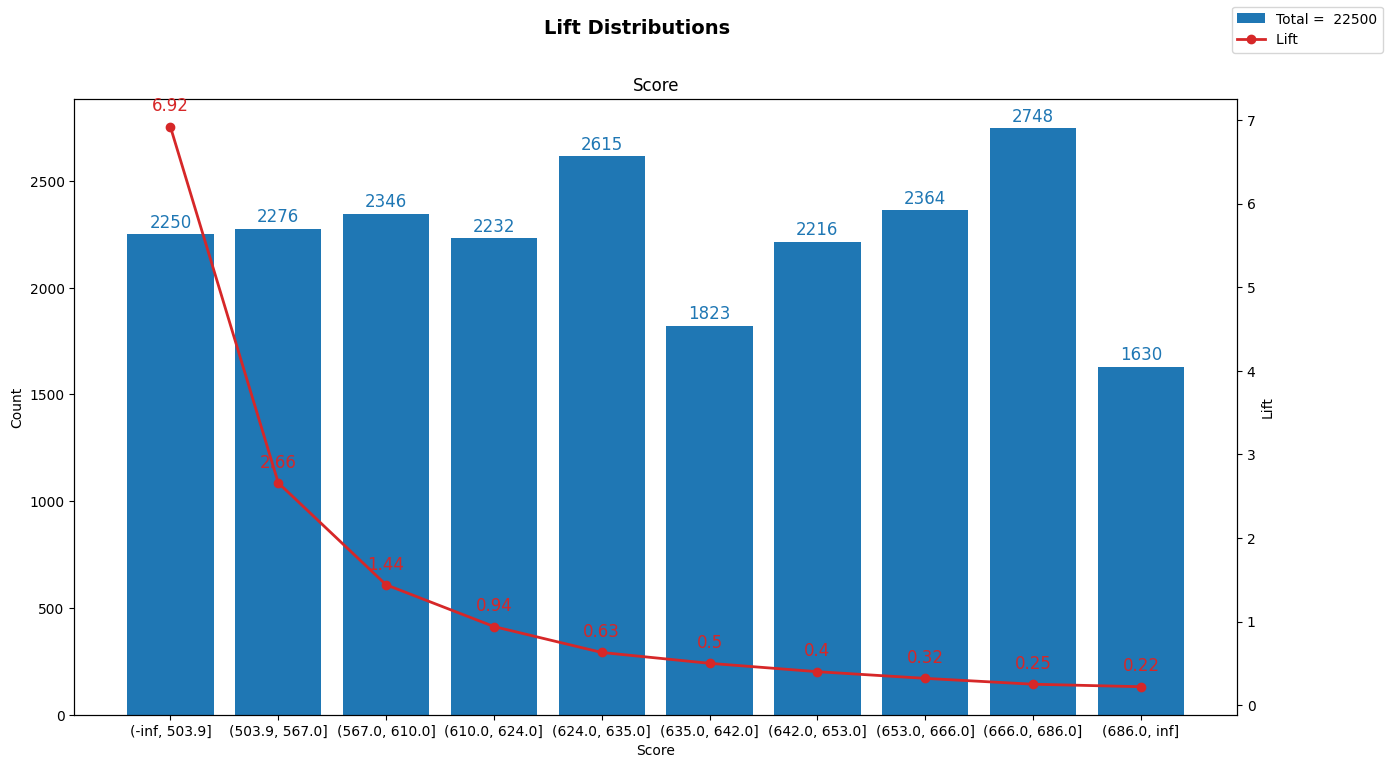

In [91]:
# 绘制提升度图    
plot_lift(data_train_score)

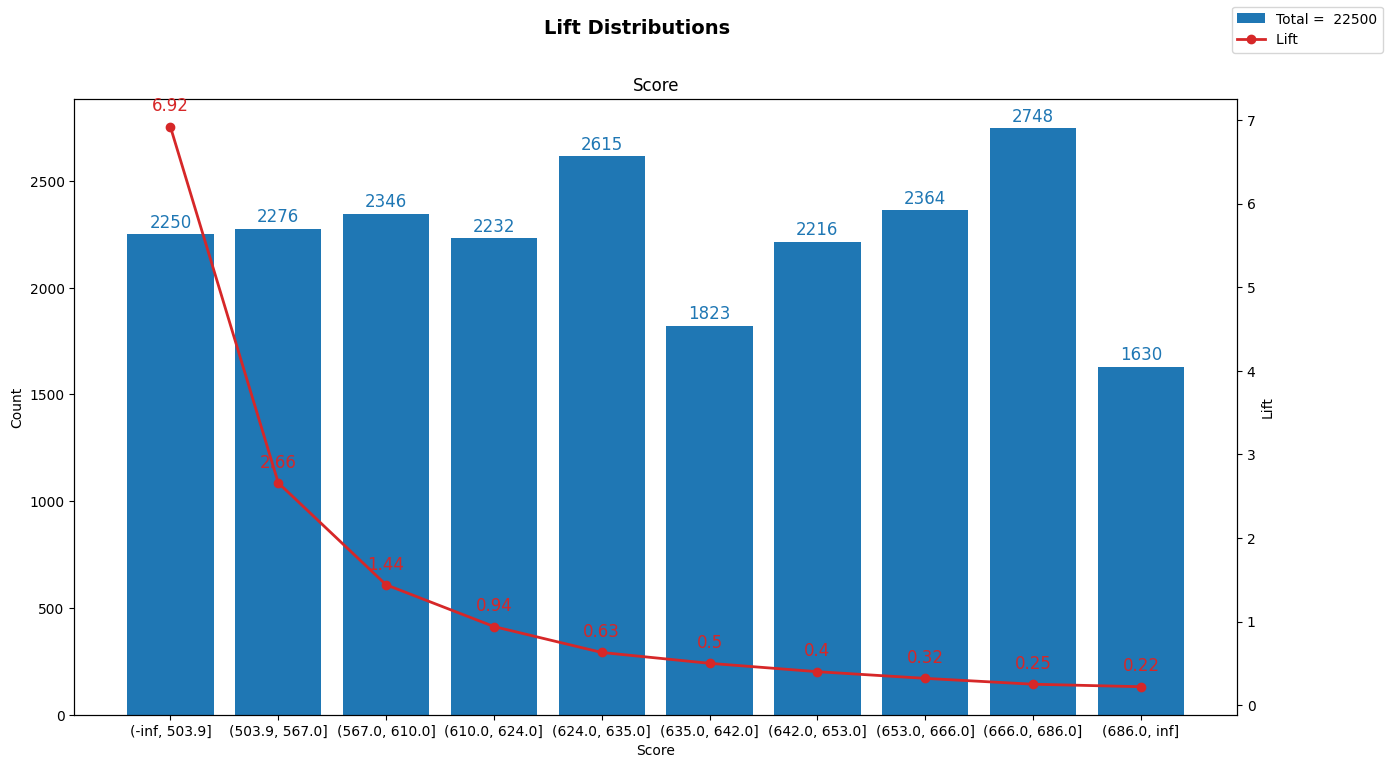

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 503.9]",2250,1556,694,10.00%,31.52%,3.95%,69.16%,21.94%,69.16%,10.00%,6.92
1,2,"(503.9, 567.0]",2276,863,1413,10.12%,17.48%,8.04%,37.92%,21.94%,53.45%,20.12%,2.66
2,3,"(567.0, 610.0]",2346,600,1746,10.43%,12.16%,9.94%,25.58%,21.94%,43.93%,30.54%,1.44
3,4,"(610.0, 624.0]",2232,433,1799,9.92%,8.77%,10.24%,19.40%,21.94%,37.92%,40.46%,0.94
4,5,"(624.0, 635.0]",2615,395,2220,11.62%,8.00%,12.64%,15.11%,21.94%,32.83%,52.08%,0.63
5,6,"(635.0, 642.0]",1823,267,1556,8.10%,5.41%,8.86%,14.65%,21.94%,30.38%,60.19%,0.50
6,7,"(642.0, 653.0]",2216,292,1924,9.85%,5.92%,10.95%,13.18%,21.94%,27.96%,70.04%,0.40
7,8,"(653.0, 666.0]",2364,210,2154,10.51%,4.25%,12.26%,8.88%,21.94%,25.47%,80.54%,0.32
8,9,"(666.0, 686.0]",2748,231,2517,12.21%,4.68%,14.33%,8.41%,21.94%,23.22%,92.76%,0.25
9,10,"(686.0, inf]",1630,89,1541,7.24%,1.80%,8.77%,5.46%,21.94%,21.94%,100.00%,0.22


In [92]:
# 绘制提升度图，并输出提升度表格
plot_lift(data_train_score,return_data=True)

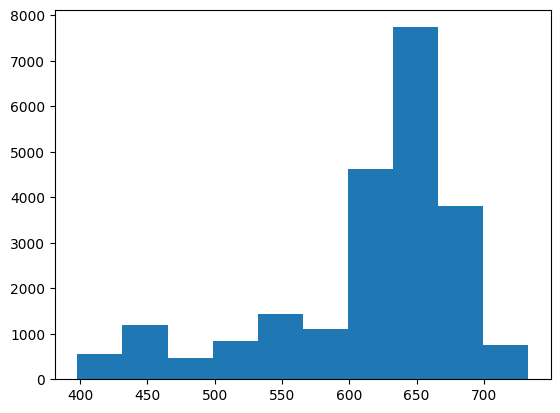

In [93]:
# 查看训练集分数分布

import matplotlib.pyplot as plt
plt.style.use('default')
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.hist(data_train_score['Score'] )
plt.show()

## 模型稳定型 PSI计算

In [94]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
get_psi(data_train_score,data_test_score)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,Score,"(-inf, 503.9]",3018,2250,768,10.06%,10.00%,10.24%,0.00,0.07
1,2,Score,"(503.9, 567.0]",3026,2276,750,10.09%,10.12%,10.00%,0.00,0.07
2,3,Score,"(567.0, 610.0]",3018,2346,672,10.06%,10.43%,8.96%,0.00,0.07
3,4,Score,"(610.0, 624.0]",2945,2232,713,9.82%,9.92%,9.51%,0.00,0.07
4,5,Score,"(624.0, 635.0]",3065,2615,450,10.22%,11.62%,6.00%,0.04,0.07
5,6,Score,"(635.0, 642.0]",2706,1823,883,9.02%,8.10%,11.77%,0.01,0.07
6,7,Score,"(642.0, 653.0]",3054,2216,838,10.18%,9.85%,11.17%,0.00,0.07
7,8,Score,"(653.0, 666.0]",3151,2364,787,10.50%,10.51%,10.49%,0.00,0.07
8,9,Score,"(666.0, 686.0]",3555,2748,807,11.85%,12.21%,10.76%,0.00,0.07
9,10,Score,"(686.0, inf]",2462,1630,832,8.21%,7.24%,11.09%,0.02,0.07


In [95]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
view_psi(data_train_score,data_test_score)

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 503.9]",3018,2250,768,10.06%,10.00%,10.24%,0.000000,0.070000,0.000000
1,2,Score,"(503.9, 567.0]",3026,2276,750,10.09%,10.12%,10.00%,0.000000,0.070000,0.000000
2,3,Score,"(567.0, 610.0]",3018,2346,672,10.06%,10.43%,8.96%,0.000000,0.070000,0.000000
3,4,Score,"(610.0, 624.0]",2945,2232,713,9.82%,9.92%,9.51%,0.000000,0.070000,0.000000
4,5,Score,"(624.0, 635.0]",3065,2615,450,10.22%,11.62%,6.00%,0.040000,0.070000,0.040000
5,6,Score,"(635.0, 642.0]",2706,1823,883,9.02%,8.10%,11.77%,0.010000,0.070000,0.010000
6,7,Score,"(642.0, 653.0]",3054,2216,838,10.18%,9.85%,11.17%,0.000000,0.070000,0.000000
7,8,Score,"(653.0, 666.0]",3151,2364,787,10.50%,10.51%,10.49%,0.000000,0.070000,0.000000
8,9,Score,"(666.0, 686.0]",3555,2748,807,11.85%,12.21%,10.76%,0.000000,0.070000,0.000000
9,10,Score,"(686.0, inf]",2462,1630,832,8.21%,7.24%,11.09%,0.020000,0.070000,0.020000


In [96]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
view_psi(data_train_score,data_test_score,color='green')

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 503.9]",3018,2250,768,10.06%,10.00%,10.24%,0.000000,0.070000,0.000000
1,2,Score,"(503.9, 567.0]",3026,2276,750,10.09%,10.12%,10.00%,0.000000,0.070000,0.000000
2,3,Score,"(567.0, 610.0]",3018,2346,672,10.06%,10.43%,8.96%,0.000000,0.070000,0.000000
3,4,Score,"(610.0, 624.0]",2945,2232,713,9.82%,9.92%,9.51%,0.000000,0.070000,0.000000
4,5,Score,"(624.0, 635.0]",3065,2615,450,10.22%,11.62%,6.00%,0.040000,0.070000,0.040000
5,6,Score,"(635.0, 642.0]",2706,1823,883,9.02%,8.10%,11.77%,0.010000,0.070000,0.010000
6,7,Score,"(642.0, 653.0]",3054,2216,838,10.18%,9.85%,11.17%,0.000000,0.070000,0.000000
7,8,Score,"(653.0, 666.0]",3151,2364,787,10.50%,10.51%,10.49%,0.000000,0.070000,0.000000
8,9,Score,"(666.0, 686.0]",3555,2748,807,11.85%,12.21%,10.76%,0.000000,0.070000,0.000000
9,10,Score,"(686.0, inf]",2462,1630,832,8.21%,7.24%,11.09%,0.020000,0.070000,0.020000


In [97]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
view_psi(data_train_score,data_test_score,color='#02B057')

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 503.9]",3018,2250,768,10.06%,10.00%,10.24%,0.000000,0.070000,0.000000
1,2,Score,"(503.9, 567.0]",3026,2276,750,10.09%,10.12%,10.00%,0.000000,0.070000,0.000000
2,3,Score,"(567.0, 610.0]",3018,2346,672,10.06%,10.43%,8.96%,0.000000,0.070000,0.000000
3,4,Score,"(610.0, 624.0]",2945,2232,713,9.82%,9.92%,9.51%,0.000000,0.070000,0.000000
4,5,Score,"(624.0, 635.0]",3065,2615,450,10.22%,11.62%,6.00%,0.040000,0.070000,0.040000
5,6,Score,"(635.0, 642.0]",2706,1823,883,9.02%,8.10%,11.77%,0.010000,0.070000,0.010000
6,7,Score,"(642.0, 653.0]",3054,2216,838,10.18%,9.85%,11.17%,0.000000,0.070000,0.000000
7,8,Score,"(653.0, 666.0]",3151,2364,787,10.50%,10.51%,10.49%,0.000000,0.070000,0.000000
8,9,Score,"(666.0, 686.0]",3555,2748,807,11.85%,12.21%,10.76%,0.000000,0.070000,0.000000
9,10,Score,"(686.0, inf]",2462,1630,832,8.21%,7.24%,11.09%,0.020000,0.070000,0.020000


In [98]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照等频分箱，分为5组，计算PSI
get_psi(data_train_score,data_test_score,col='LIMIT_BAL',qcut=5,precision=4)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,LIMIT_BAL,"(-inf, 50000.0]",7676,5855,1821,25.5867%,26.0222%,24.2800%,0.00,0.00
1,2,LIMIT_BAL,"(50000.0, 100000.0]",4822,3593,1229,16.0733%,15.9689%,16.3867%,0.00,0.00
2,3,LIMIT_BAL,"(100000.0, 180000.0]",6123,4548,1575,20.4100%,20.2133%,21.0000%,0.00,0.00
3,4,LIMIT_BAL,"(180000.0, 270000.0]",5421,4035,1386,18.0700%,17.9333%,18.4800%,0.00,0.00
4,5,LIMIT_BAL,"(270000.0, inf]",5958,4469,1489,19.8600%,19.8622%,19.8533%,0.00,0.00


In [99]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照指定的切分点，计算PSI
get_psi(data_train_score,data_test_score,col='LIMIT_BAL',bins=[-inf,30000,50000,100000,inf],precision=4)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,LIMIT_BAL,"(-inf, 30000.0]",4111,3109,1002,13.7033%,13.8178%,13.3600%,0.00,0.00
1,2,LIMIT_BAL,"(30000.0, 50000.0]",3649,2746,903,12.1633%,12.2044%,12.0400%,0.00,0.00
2,3,LIMIT_BAL,"(50000.0, 100000.0]",4794,3593,1201,15.9800%,15.9689%,16.0133%,0.00,0.00
3,4,LIMIT_BAL,"(100000.0, inf]",17446,13052,4394,58.1533%,58.0089%,58.5867%,0.00,0.00


In [100]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照指定的切分点，计算PSI，标题显示为中文
get_psi(data_train_score,data_test_score,col='LIMIT_BAL',bins=[-inf,30000,50000,100000,inf],precision=4,language='cn')

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,序号,名称,分组,#合计,#实际,#期望,%合计,%实际,%期望,PSI,PSI 合计
0,1,LIMIT_BAL,"(-inf, 30000.0]",4111,3109,1002,13.7033%,13.8178%,13.3600%,0.00,0.00
1,2,LIMIT_BAL,"(30000.0, 50000.0]",3649,2746,903,12.1633%,12.2044%,12.0400%,0.00,0.00
2,3,LIMIT_BAL,"(50000.0, 100000.0]",4794,3593,1201,15.9800%,15.9689%,16.0133%,0.00,0.00
3,4,LIMIT_BAL,"(100000.0, inf]",17446,13052,4394,58.1533%,58.0089%,58.5867%,0.00,0.00


In [101]:
# 批量计算所有特征的PSI
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

get_data_psi(data_train_score,data_test_score,precision=4)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,Name,PSI
16,Score,0.07
8,PAY_AMT3,0.00
4,LIMIT_BAL,0.00
17,Proba,0.00
6,PAY_AMT2,0.00
14,PAY_AMT6,0.00
10,PAY_AMT4,0.00
12,PAY_AMT5,0.00
2,PAY_AMT1,0.00
7,PAY_AMT2_Score,0.00


## 模型应用分析

### 决策树分析

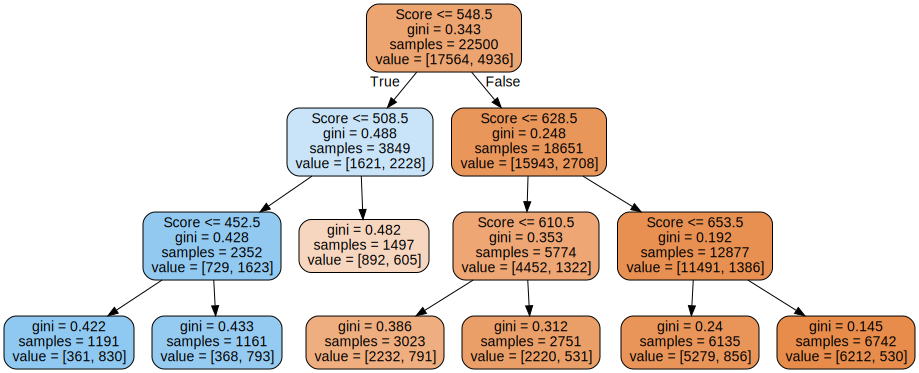

In [102]:
plot_tree(data_train_score[['Score','y']],max_depth=3,criterion='gini')

In [103]:
# 绘制决策树，并保存图片到本地
plot_tree(data_train_score[['Score','y']],max_depth=3,criterion='gini',out_file='test.svg')

0

In [104]:
# 绘制决策树，并保存图片到本地
plot_tree(data_train_score[['Score','y']],max_depth=3,criterion='gini',out_file='test.pdf')

0

In [105]:
# 计算基尼不纯度,使用原始数据
gini_impurity([1,1,1,0])

0.38

In [106]:
# 计算基尼不纯度,直接使用统计后数据进行计算
gini_impurity(c=[17564,4936])

0.34

## 金融函数

In [107]:
# 等额本息，计算每月还款
debx(amount=500000,rate=0.043,period=240)

3109.52

In [108]:
# 等额本息，查看还款计划
a = debx(amount=500000,rate=0.043,period=240,return_data=True)
a['data']

,期数,每月还款,本期本金,本期利息,本期剩余
0,1,3109.52,1317.85,1791.67,498682.15
1,2,3109.52,1322.58,1786.94,497359.57
2,3,3109.52,1327.31,1782.21,496032.26
3,4,3109.52,1332.07,1777.45,494700.19
4,5,3109.52,1336.84,1772.68,493363.35
...,...,...,...,...,...
235,236,3109.52,3054.40,55.12,12328.63
236,237,3109.52,3065.34,44.18,9263.29
237,238,3109.52,3076.33,33.19,6186.96
238,239,3109.52,3087.35,22.17,3099.61


In [109]:
# 等额本金，查看还款计划
a = debj(amount=500000,rate=0.043,period=240,return_data=True)
a['data']

,期数,每月还款,本期本金,本期利息,本期剩余
0,1,3875.00,2083.33,1791.67,497916.67
1,2,3867.53,2083.33,1784.20,495833.34
2,3,3860.07,2083.33,1776.74,493750.01
3,4,3852.60,2083.33,1769.27,491666.68
4,5,3845.14,2083.33,1761.81,489583.35
...,...,...,...,...,...
235,236,2120.66,2083.33,37.33,8334.12
236,237,2113.20,2083.33,29.87,6250.79
237,238,2105.73,2083.33,22.40,4167.46
238,239,2098.27,2083.33,14.94,2084.13


## 数学计算函数

In [110]:
sin(1)

0.8415

In [111]:
cos(1)

0.5403

## 日期计算函数

In [112]:
year_start('2023-05-23')

datetime.datetime(2023, 1, 1, 0, 0)

In [113]:
year_end('2023-05-23')

datetime.datetime(2023, 12, 31, 0, 0)

In [114]:
month_start('2023-05-23')

datetime.datetime(2023, 5, 1, 0, 0)

In [115]:
month_end('2023-04-23')

datetime.datetime(2023, 4, 30, 0, 0)

In [116]:
add_months('2023-04-30',-2)

datetime.datetime(2023, 2, 28, 0, 0)

In [117]:
# 计算日期差
date_diff('2023-05-01','2023-05-16')

15

In [118]:
# 计算月份差
date_diff('2023-05-01','2023-05-16','m')

0.5

In [119]:
# 计算年份差
date_diff('2022-05-01','2023-05-02','y')

1.0

In [120]:
# 计算月份差
month_diff('2023-05-01','2023-05-16')

0.5

In [121]:
# 计算月份差, 计算时日期按照1日进行计算，例如 '2023-05-15' 按 '2023-05-01'，'2023-06-16' 按'2023-06-01'进行计算 
month_diff('2023-05-15','2023-06-16',method='mm')

1

## 正则函数

In [122]:
# 正则查找函数
regexp_like('2023','[a-z]+')

False

In [123]:
# 正则替换函数
regexp_replace('2023westat2023','[0-9]+','')

'westat'

## 其他统计函数

In [124]:
# 获取指定值最大连续次数
get_max_continue([1,2,2,1,2,2,2,0],2)

3

In [125]:
# 获取连续大于指定值的次数,例如：检查列表中连续大于1的次数
get_over_continue([1,2,2,1,2,3,4,0],1)

3

In [126]:
# 获取大于指定值2，且相等的最大连续次数
get_over_continue([3,4,2,1,2,3,3,4,0],2,eq=True)

2

In [127]:
# nvl函数，如果变量取值为空，则赋值为另一个值
a=None
nvl(a,5)

5